#Exercise 3: Simulated Annealing

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

#Describing travelling salesman problem

The traveling salesman problem that involves finding the shortest possible route that visits a set of cities and returns to the starting city. The problem is one of the most famous examples of a class of optimization problems known as combinatorial optimization problems.


In the TSP, the goal is to find the shortest possible route that visits each city exactly once and returns to the starting city. The problem can be formulated as a graph, where each city is represented as a node and the edges between nodes represent the distances between cities. The TSP is a well-known NP-hard problem, which means that there is no known efficient algorithm that can solve it exactly for large problem instances.

The TSP has many real-world applications, such as in logistics, transportation, and network design. For example, a delivery company might need to find the shortest route to visit a set of cities in order to minimize travel time and fuel costs. Similarly, a telecommunications company might need to design a network that connects a set of cities while minimizing the total length of cable or fiber optic lines used


$$\text{minimize } \sum_{i,j \in V, i \neq j} d_{ij} x_{ij} $$

The notation $\sum$ denotes summation, $V$ is the set of cities, $d_{ij}$ is the distance between cities $i$ and $j$, and $x_{ij}$ is a binary variable that takes the value 1 if the salesman travels directly from city $i$ to city $j$, and 0 otherwise.

In [31]:
# Read distance matrix
distance_matrix = np.loadtxt(open("TSP11.csv", "rb"), delimiter=",")
print(distance_matrix)

[[  0.  29.  20.  21.  16.  31. 100.  12.   4.  31.  18.]
 [ 29.   0.  15.  29.  28.  40.  72.  21.  29.  41.  12.]
 [ 20.  15.   0.  15.  14.  25.  81.   9.  23.  27.  13.]
 [ 21.  29.  15.   0.   4.  12.  92.  12.  25.  13.  25.]
 [ 16.  28.  14.   4.   0.  16.  94.   9.  20.  16.  22.]
 [ 31.  40.  25.  12.  16.   0.  95.  24.  36.   3.  37.]
 [100.  72.  81.  92.  94.  95.   0.  90. 101.  99.  84.]
 [ 12.  21.   9.  12.   9.  24.  90.   0.  15.  25.  13.]
 [  4.  29.  23.  25.  20.  36. 101.  15.   0.  35.  18.]
 [ 31.  41.  27.  13.  16.   3.  99.  25.  35.   0.  38.]
 [ 18.  12.  13.  25.  22.  37.  84.  13.  18.  38.   0.]]


$4$. (R)Given a tour of the salesman compute the cost, which is total distance travelled in that tour. Create cost()
function which takes a sequence of cities as input and calculates the total distance travelled. For example in
a 4 city scenario, given the sequence of cities as [B,C,D,A], your function should calculate the total distance
travelled in that particular order.


In [32]:
def cost(x):
    return np.sum(distance_matrix[x[i], x[(i+1)%len(x)]] for i in range(len(x)))

$5$. (R) Now we will create the neighbour() function. In TSP, neighbour of a state is defined as the new states
obtained by swapping two consecutive cities. For example, in 4 city case, every state has 4 neighbours and
neighbour of [A,B,C,D] are [B,A,C,D], [A,C,B,D], [A,B,D,C], [D,B,C,A]. Your function should choose one of
the neighbours uniformly.

In [33]:
# define neighbour function
def neighbour(x):
    i, j = np.random.choice(len(x), 2, replace=True)
    y = np.copy(x)
    y[i], y[j] = y[j], y[i]
    return y

In [34]:
# define acceptance probability function
def accept_prob(c1, c, t):
    if c1 <= c:
        return 1
    else:
        return np.exp(-(c1 - c) / t)

In [35]:
# define simulated annealing function
def simulated_annealing(cost, neighbour, accept_prob, T0, alpha, maxiter):
    x = np.random.permutation(len(distance_matrix))
    c = cost(x)
    best_x, best_c = x, c
    T = T0
    costs = []
    for k in range(maxiter):
        y = neighbour(x)
        c1 = cost(y)
        p = accept_prob(c1, c, T)
        if p >= np.random.uniform():
            x, c = y, c1
        if c < best_c:
            best_x, best_c = x, c
        T = alpha * T
        costs.append(best_c)
    return best_x, best_c, costs

8. (R) Run the simulated annealing algorithm and report the solution. Plot the cost function for each iteration
and explain. Choose different T0, α values and observe the effect.

Solution:

In [36]:
# run simulated annealing with T0=1 and alpha=0.8
x, c, costs = simulated_annealing(cost, neighbour, accept_prob, T0=1, alpha=0.8, maxiter=10000)
print("__________________________________________________________________________________________________________________________________________________________________")
print("neighbour",neighbour(x))
print("_____________________________________________________________________________________________________________________________________________________________________")
print("cost",costs)
print("_______________________________________________________________________________________________________________________________________________________________________")
print("Best tour:", x)
print("___________________________________________________________________________________________________________________________________________________________________")
print("Best cost:", c)


<ipython-input-32-179a49e17485>:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(distance_matrix[x[i], x[(i+1)%len(x)]] for i in range(len(x)))
<ipython-input-34-4f74131624f7>:6: RuntimeWarning: overflow encountered in double_scalars
  return np.exp(-(c1 - c) / t)


__________________________________________________________________________________________________________________________________________________________________
neighbour [ 9  5  3  4  7  8  6  1 10  2  0]
_____________________________________________________________________________________________________________________________________________________________________
cost [366.0, 366.0, 366.0, 366.0, 354.0, 354.0, 354.0, 354.0, 315.0, 315.0, 315.0, 308.0, 308.0, 308.0, 308.0, 308.0, 308.0, 308.0, 308.0, 308.0, 308.0, 308.0, 308.0, 308.0, 308.0, 308.0, 308.0, 308.0, 308.0, 308.0, 308.0, 308.0, 308.0, 308.0, 304.0, 304.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 283.0, 274.0, 274.0, 269.0, 269.0, 269.0, 269.0, 269.0, 269.

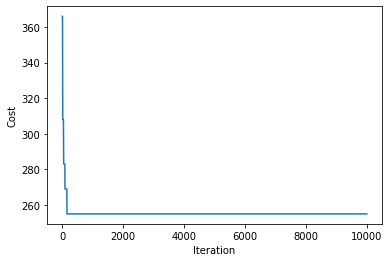

In [37]:
# plot cost function for each iteration
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

<ipython-input-32-179a49e17485>:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(distance_matrix[x[i], x[(i+1)%len(x)]] for i in range(len(x)))
<ipython-input-34-4f74131624f7>:6: RuntimeWarning: overflow encountered in double_scalars
  return np.exp(-(c1 - c) / t)
<ipython-input-34-4f74131624f7>:6: RuntimeWarning: divide by zero encountered in double_scalars
  return np.exp(-(c1 - c) / t)


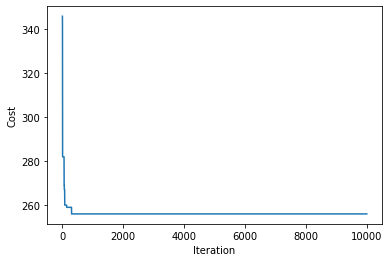

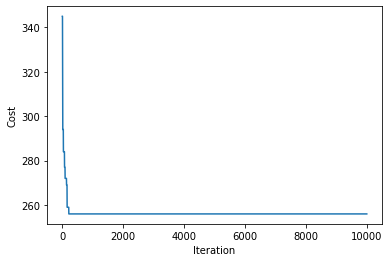

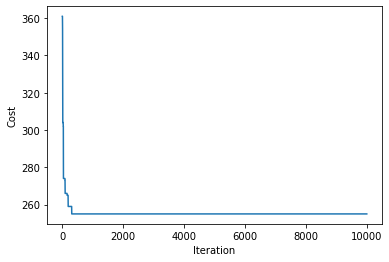

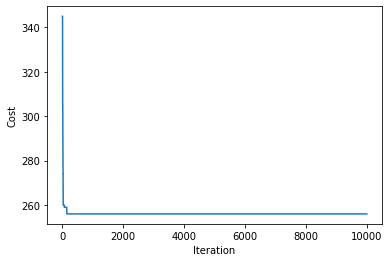

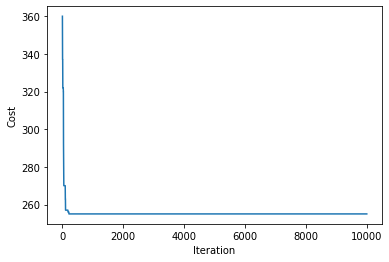

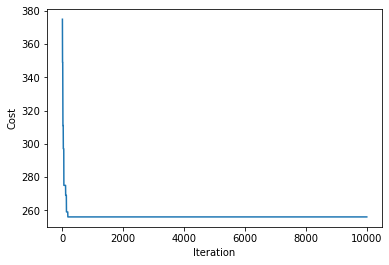

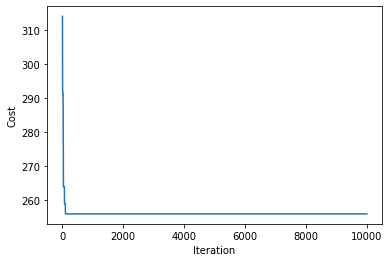

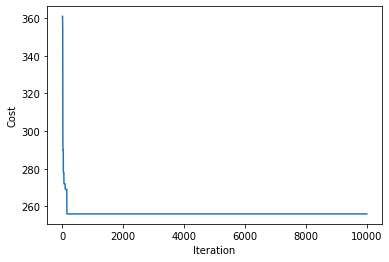

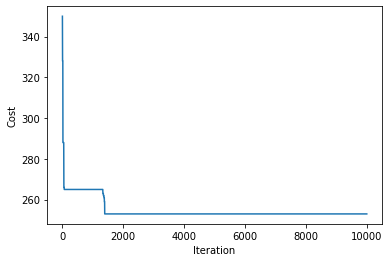

In [38]:
alpha=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]
T0 = []
for i in range(20):
    T0.append(i)
for i in alpha:
  x, c, costs = simulated_annealing(cost, neighbour, accept_prob, T0=1, alpha=i, maxiter=10000)
  plt.plot(costs)
  plt.xlabel("Iteration")
  plt.ylabel("Cost")
  plt.show()


when T0 is: 0 when alpha is: 0.1


<ipython-input-32-179a49e17485>:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(distance_matrix[x[i], x[(i+1)%len(x)]] for i in range(len(x)))
<ipython-input-34-4f74131624f7>:6: RuntimeWarning: divide by zero encountered in double_scalars
  return np.exp(-(c1 - c) / t)


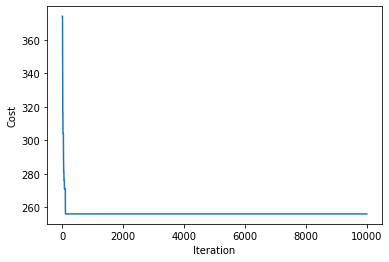

when T0 is: 0 when alpha is: 0.2


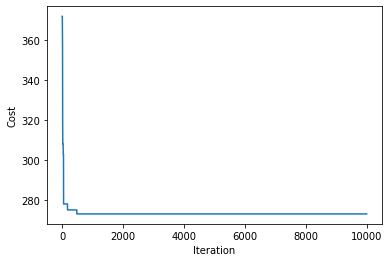

when T0 is: 0 when alpha is: 0.3


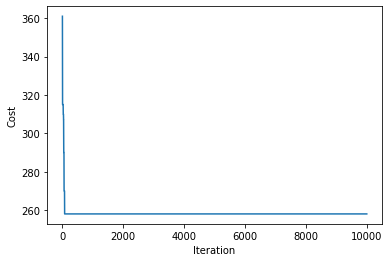

when T0 is: 0 when alpha is: 0.4


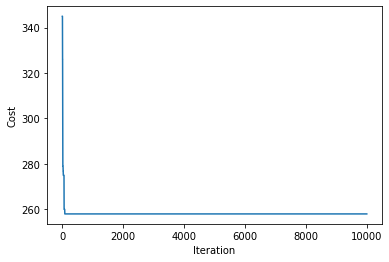

when T0 is: 0 when alpha is: 0.5


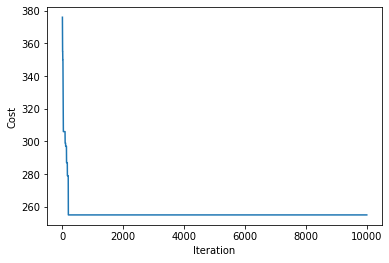

when T0 is: 0 when alpha is: 0.6


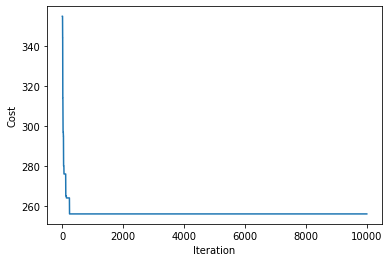

when T0 is: 0 when alpha is: 0.7


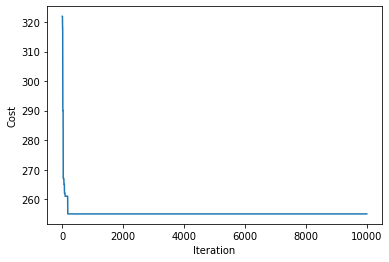

when T0 is: 0 when alpha is: 0.8


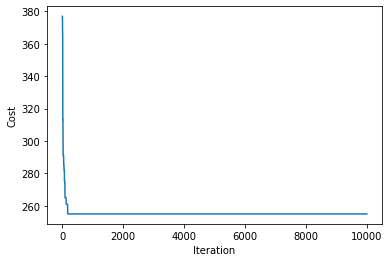

when T0 is: 0 when alpha is: 1


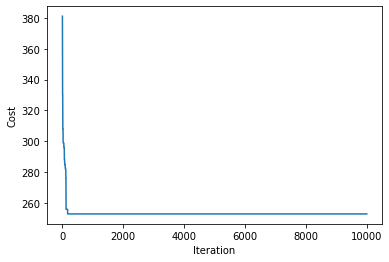

when T0 is: 1 when alpha is: 0.1


<ipython-input-34-4f74131624f7>:6: RuntimeWarning: overflow encountered in double_scalars
  return np.exp(-(c1 - c) / t)


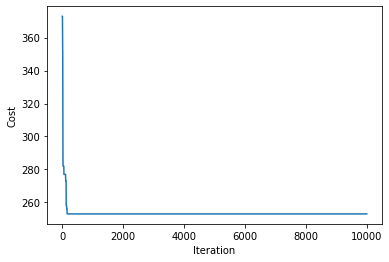

when T0 is: 1 when alpha is: 0.2


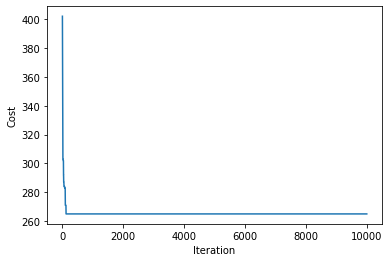

when T0 is: 1 when alpha is: 0.3


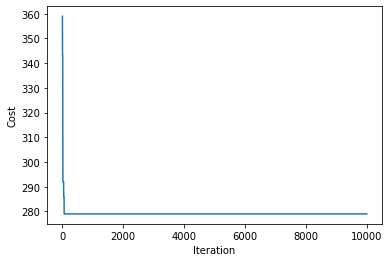

when T0 is: 1 when alpha is: 0.4


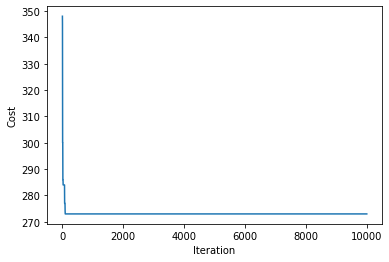

when T0 is: 1 when alpha is: 0.5


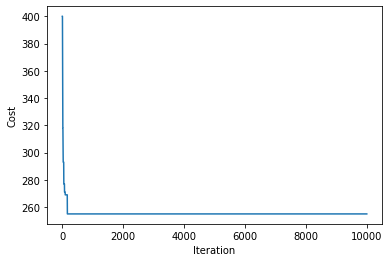

when T0 is: 1 when alpha is: 0.6


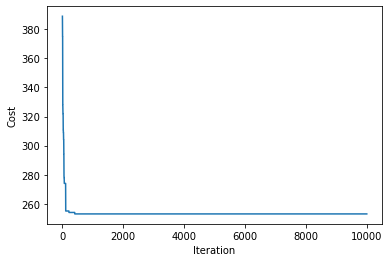

when T0 is: 1 when alpha is: 0.7


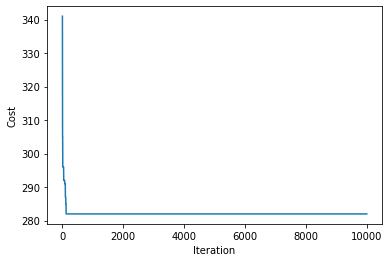

when T0 is: 1 when alpha is: 0.8


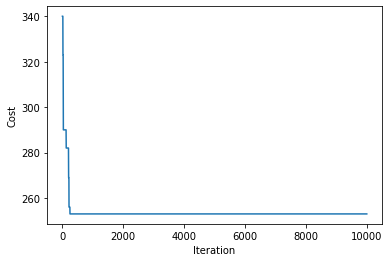

when T0 is: 1 when alpha is: 1


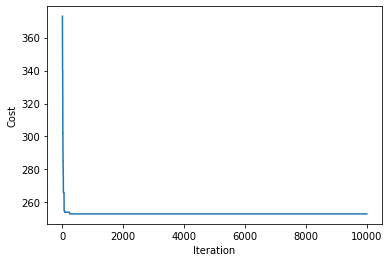

when T0 is: 2 when alpha is: 0.1


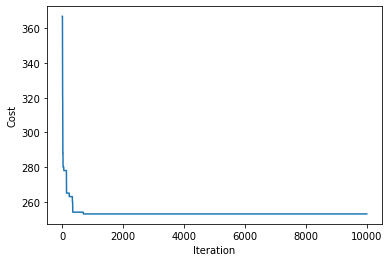

when T0 is: 2 when alpha is: 0.2


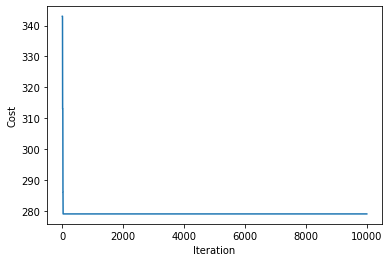

when T0 is: 2 when alpha is: 0.3


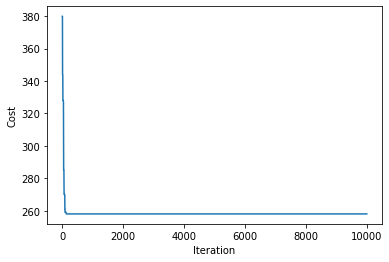

when T0 is: 2 when alpha is: 0.4


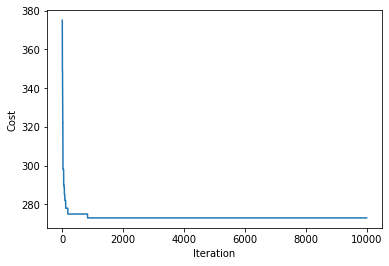

when T0 is: 2 when alpha is: 0.5


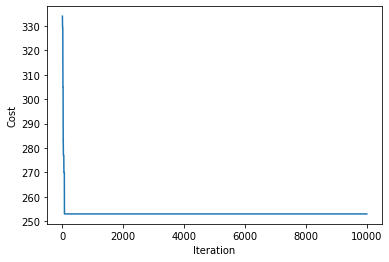

when T0 is: 2 when alpha is: 0.6


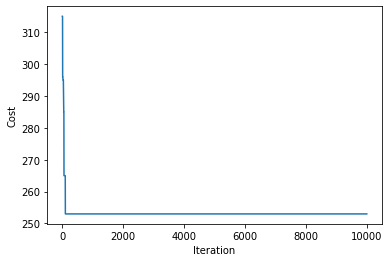

when T0 is: 2 when alpha is: 0.7


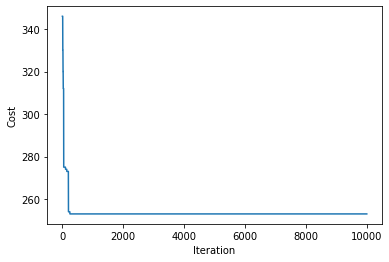

when T0 is: 2 when alpha is: 0.8


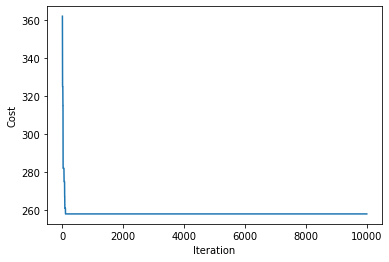

when T0 is: 2 when alpha is: 1


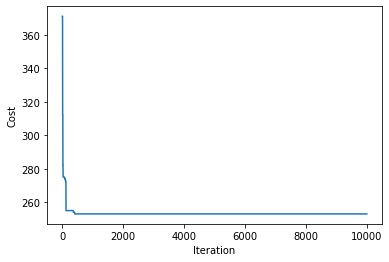

when T0 is: 3 when alpha is: 0.1


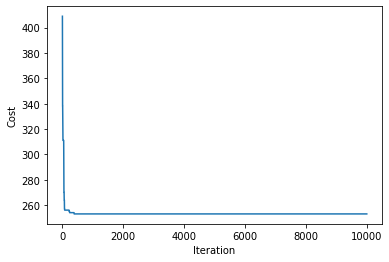

when T0 is: 3 when alpha is: 0.2


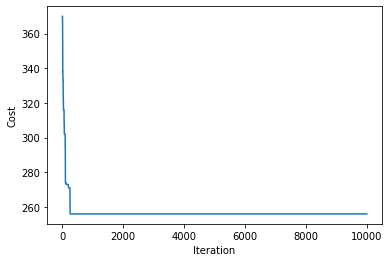

when T0 is: 3 when alpha is: 0.3


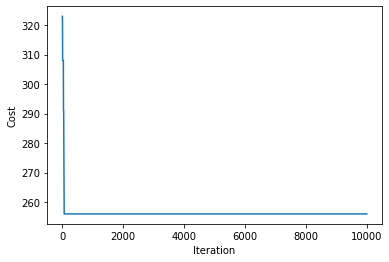

when T0 is: 3 when alpha is: 0.4


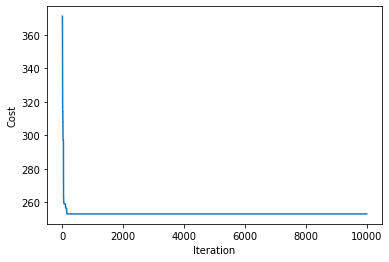

when T0 is: 3 when alpha is: 0.5


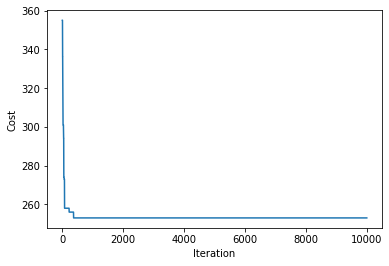

when T0 is: 3 when alpha is: 0.6


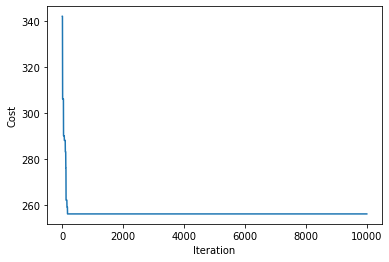

when T0 is: 3 when alpha is: 0.7


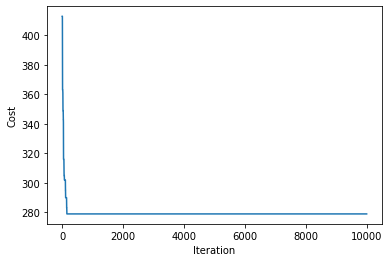

when T0 is: 3 when alpha is: 0.8


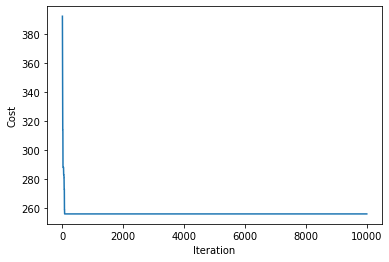

when T0 is: 3 when alpha is: 1


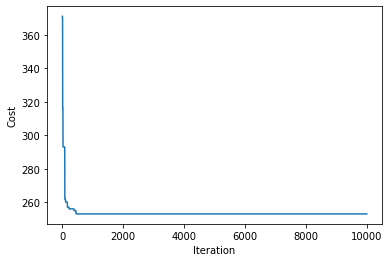

when T0 is: 4 when alpha is: 0.1


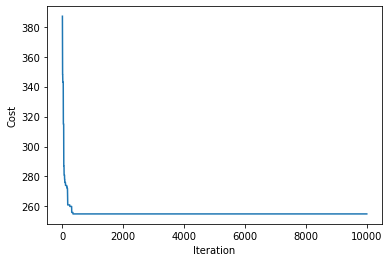

when T0 is: 4 when alpha is: 0.2


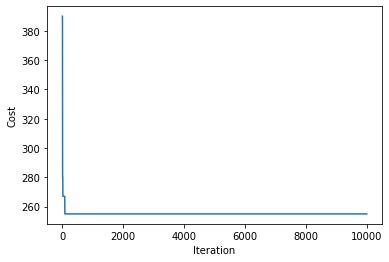

when T0 is: 4 when alpha is: 0.3


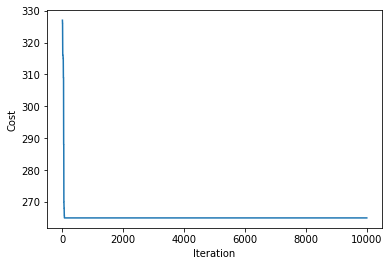

when T0 is: 4 when alpha is: 0.4


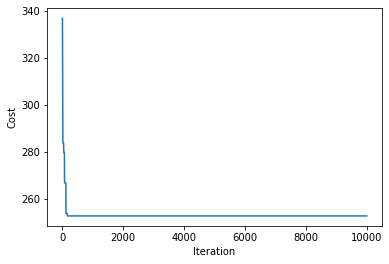

when T0 is: 4 when alpha is: 0.5


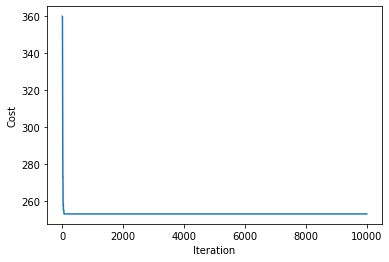

when T0 is: 4 when alpha is: 0.6


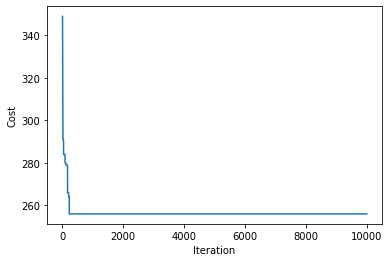

when T0 is: 4 when alpha is: 0.7


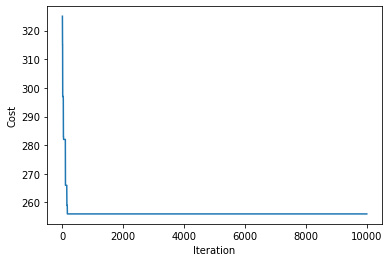

when T0 is: 4 when alpha is: 0.8


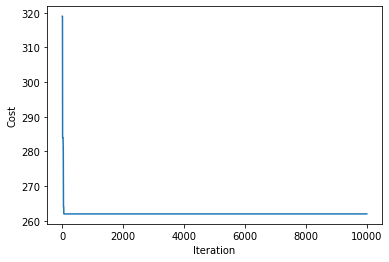

when T0 is: 4 when alpha is: 1


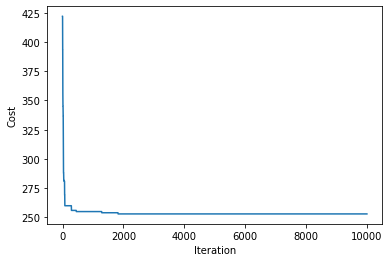

when T0 is: 5 when alpha is: 0.1


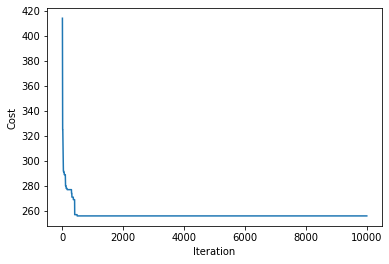

when T0 is: 5 when alpha is: 0.2


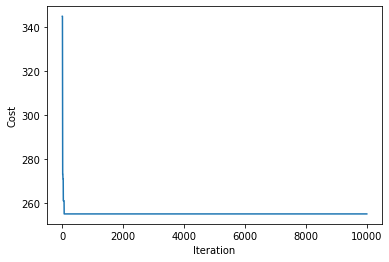

when T0 is: 5 when alpha is: 0.3


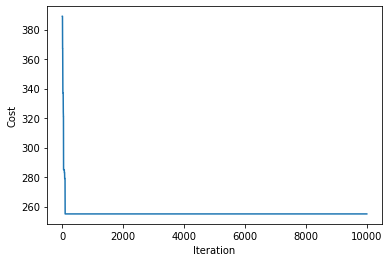

when T0 is: 5 when alpha is: 0.4


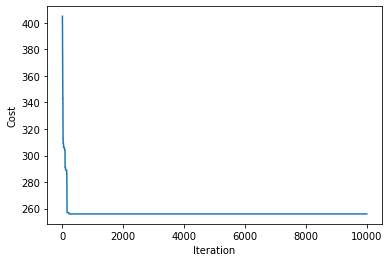

when T0 is: 5 when alpha is: 0.5


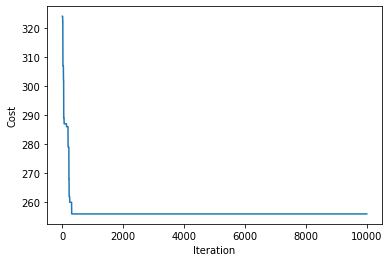

when T0 is: 5 when alpha is: 0.6


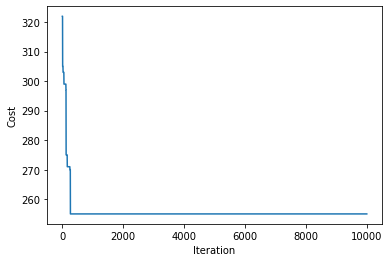

when T0 is: 5 when alpha is: 0.7


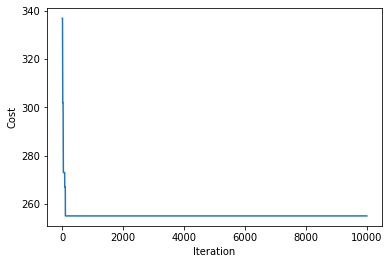

when T0 is: 5 when alpha is: 0.8


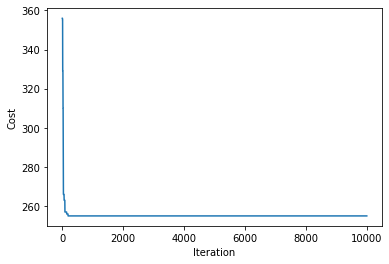

when T0 is: 5 when alpha is: 1


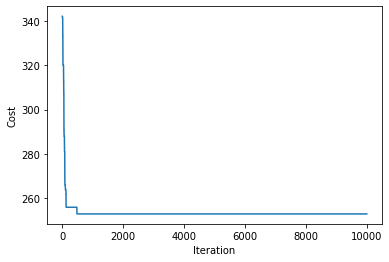

when T0 is: 6 when alpha is: 0.1


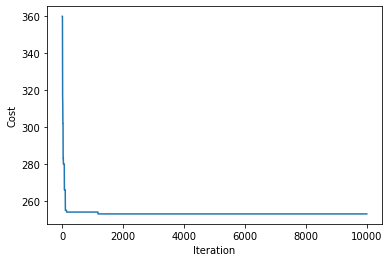

when T0 is: 6 when alpha is: 0.2


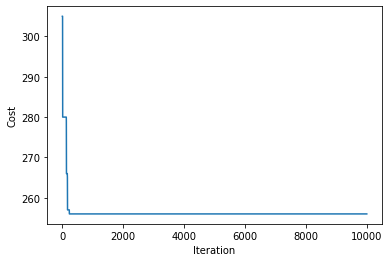

when T0 is: 6 when alpha is: 0.3


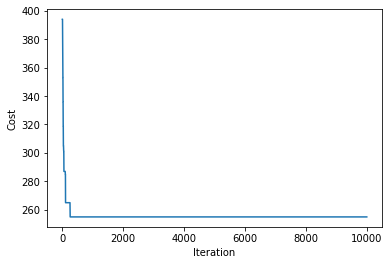

when T0 is: 6 when alpha is: 0.4


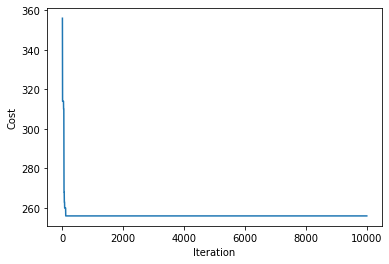

when T0 is: 6 when alpha is: 0.5


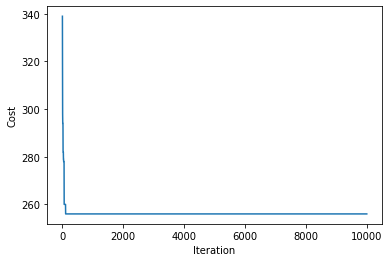

when T0 is: 6 when alpha is: 0.6


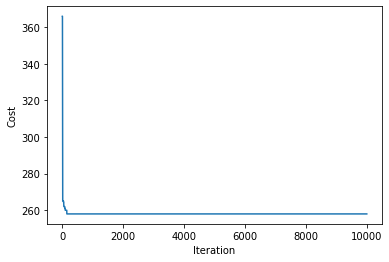

when T0 is: 6 when alpha is: 0.7


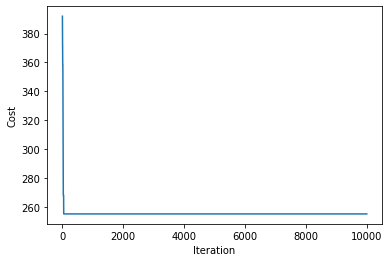

when T0 is: 6 when alpha is: 0.8


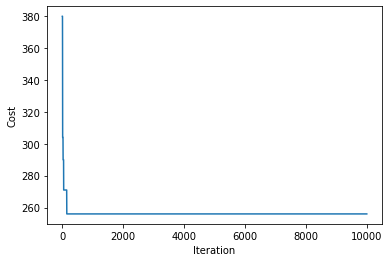

when T0 is: 6 when alpha is: 1


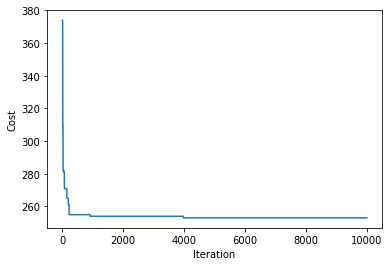

when T0 is: 7 when alpha is: 0.1


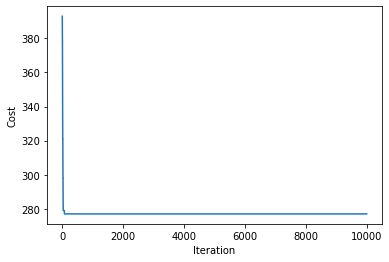

when T0 is: 7 when alpha is: 0.2


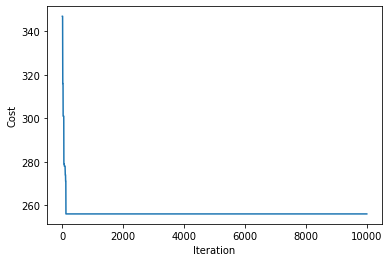

when T0 is: 7 when alpha is: 0.3


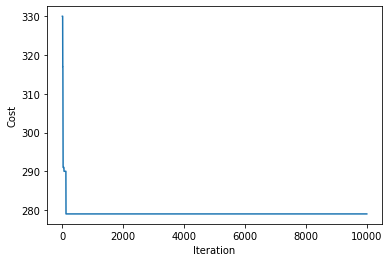

when T0 is: 7 when alpha is: 0.4


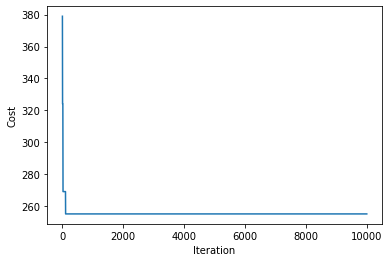

when T0 is: 7 when alpha is: 0.5


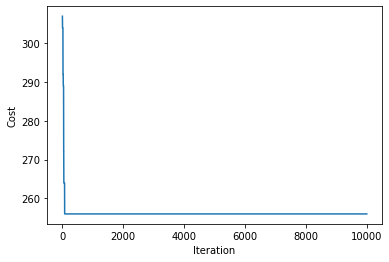

when T0 is: 7 when alpha is: 0.6


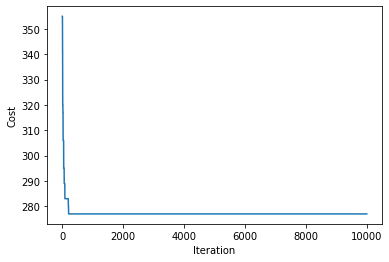

when T0 is: 7 when alpha is: 0.7


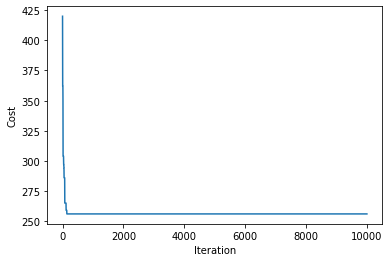

when T0 is: 7 when alpha is: 0.8


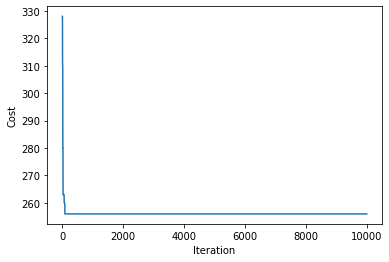

when T0 is: 7 when alpha is: 1


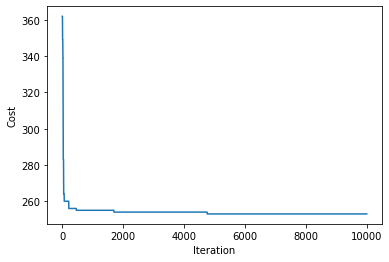

when T0 is: 8 when alpha is: 0.1


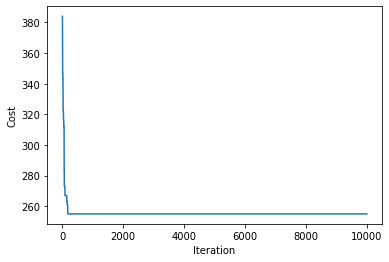

when T0 is: 8 when alpha is: 0.2


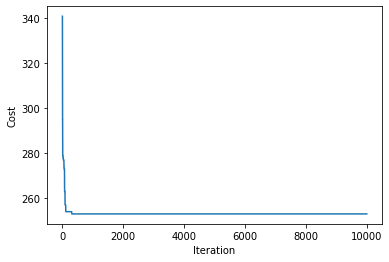

when T0 is: 8 when alpha is: 0.3


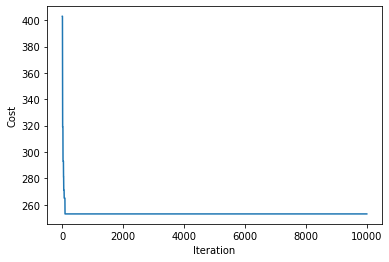

when T0 is: 8 when alpha is: 0.4


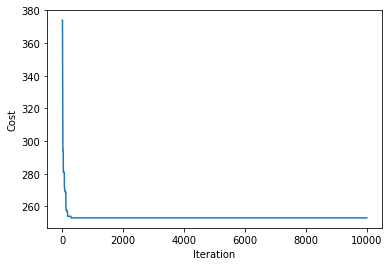

when T0 is: 8 when alpha is: 0.5


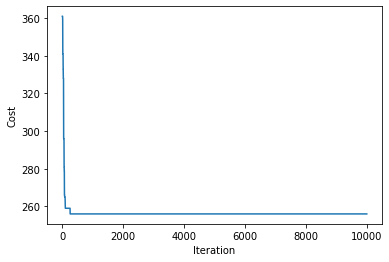

when T0 is: 8 when alpha is: 0.6


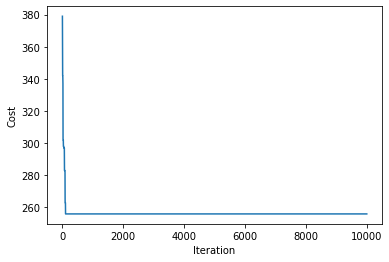

when T0 is: 8 when alpha is: 0.7


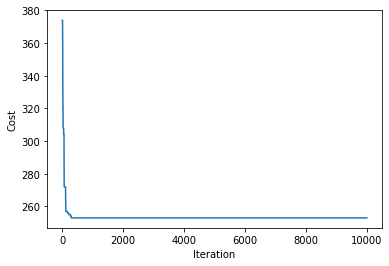

when T0 is: 8 when alpha is: 0.8


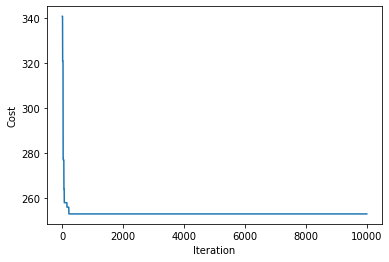

when T0 is: 8 when alpha is: 1


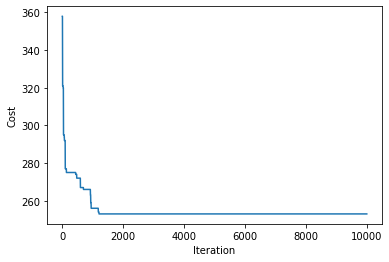

when T0 is: 9 when alpha is: 0.1


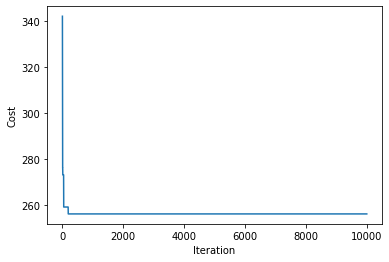

when T0 is: 9 when alpha is: 0.2


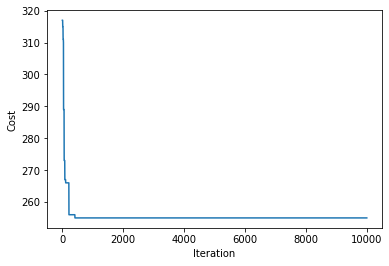

when T0 is: 9 when alpha is: 0.3


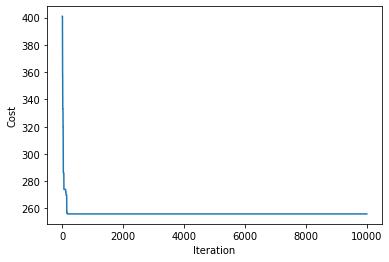

when T0 is: 9 when alpha is: 0.4


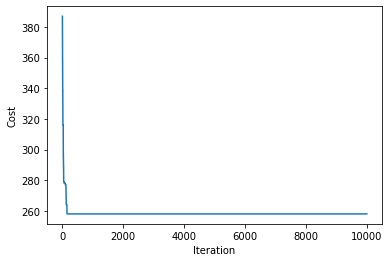

when T0 is: 9 when alpha is: 0.5


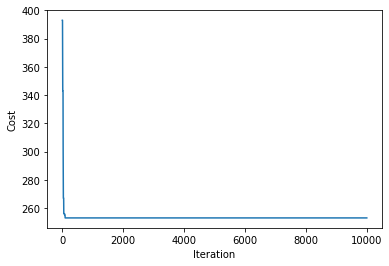

when T0 is: 9 when alpha is: 0.6


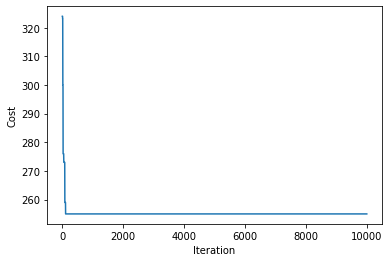

when T0 is: 9 when alpha is: 0.7


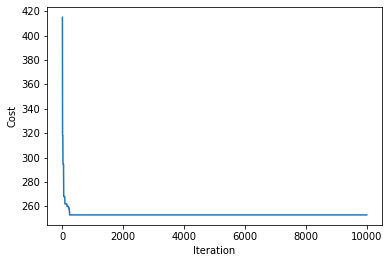

when T0 is: 9 when alpha is: 0.8


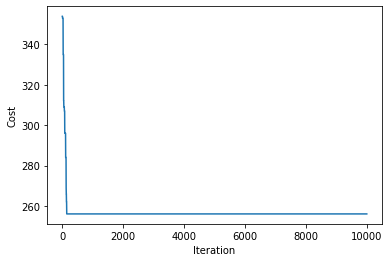

when T0 is: 9 when alpha is: 1


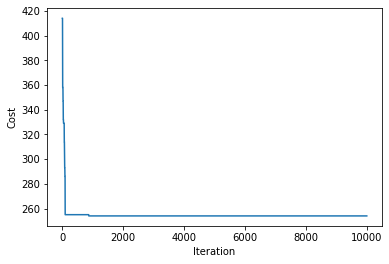

when T0 is: 10 when alpha is: 0.1


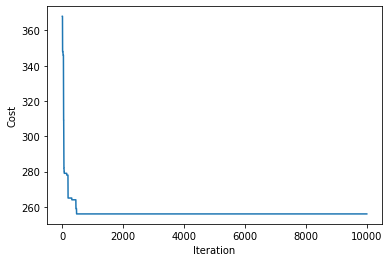

when T0 is: 10 when alpha is: 0.2


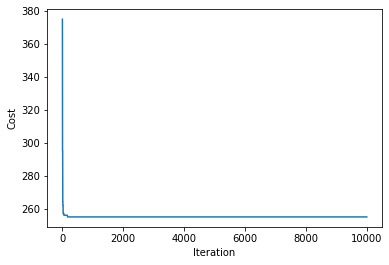

when T0 is: 10 when alpha is: 0.3


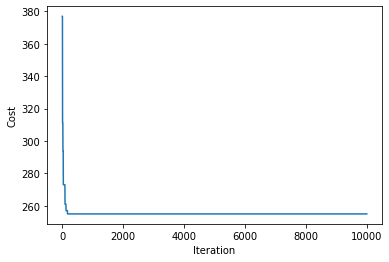

when T0 is: 10 when alpha is: 0.4


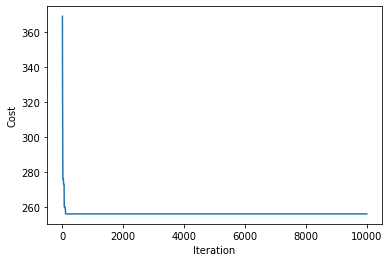

when T0 is: 10 when alpha is: 0.5


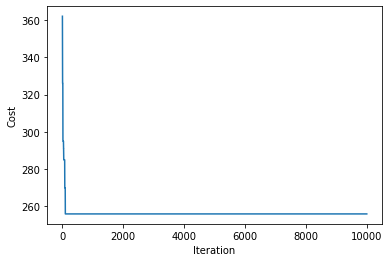

when T0 is: 10 when alpha is: 0.6


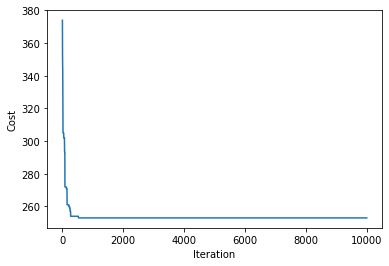

when T0 is: 10 when alpha is: 0.7


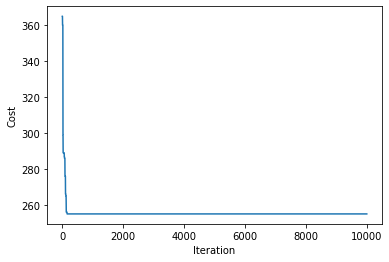

when T0 is: 10 when alpha is: 0.8


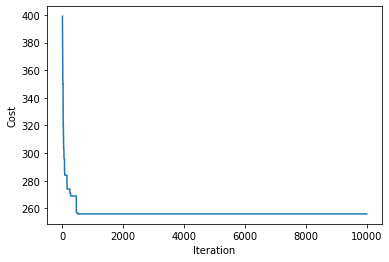

when T0 is: 10 when alpha is: 1


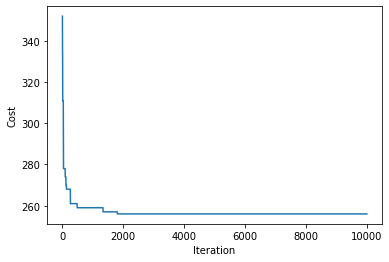

when T0 is: 11 when alpha is: 0.1


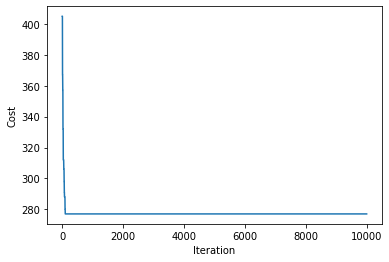

when T0 is: 11 when alpha is: 0.2


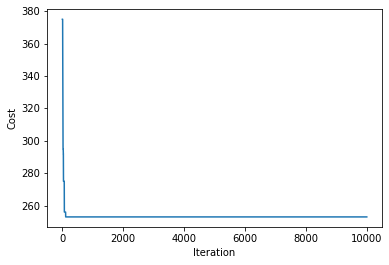

when T0 is: 11 when alpha is: 0.3


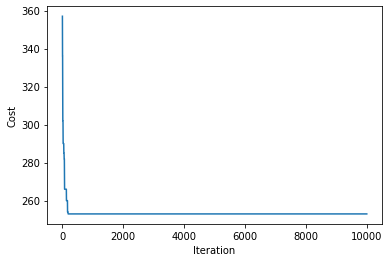

when T0 is: 11 when alpha is: 0.4


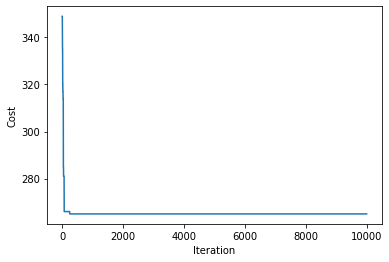

when T0 is: 11 when alpha is: 0.5


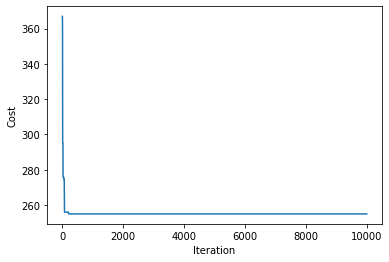

when T0 is: 11 when alpha is: 0.6


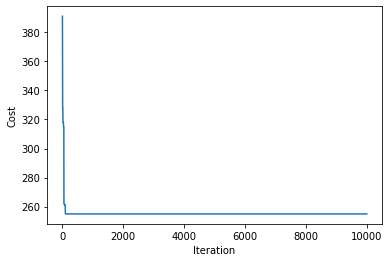

when T0 is: 11 when alpha is: 0.7


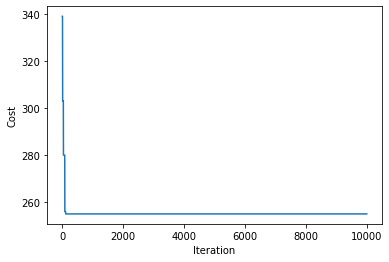

when T0 is: 11 when alpha is: 0.8


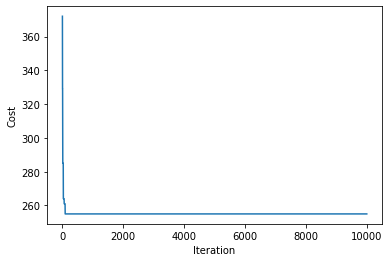

when T0 is: 11 when alpha is: 1


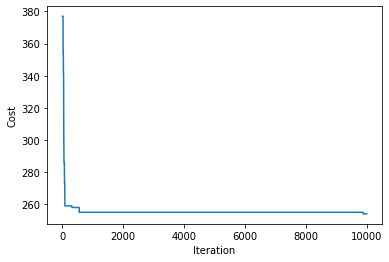

when T0 is: 12 when alpha is: 0.1


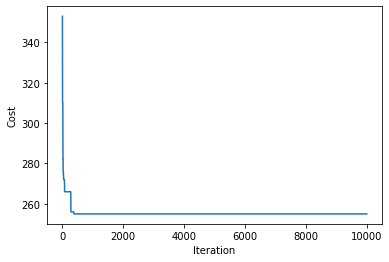

when T0 is: 12 when alpha is: 0.2


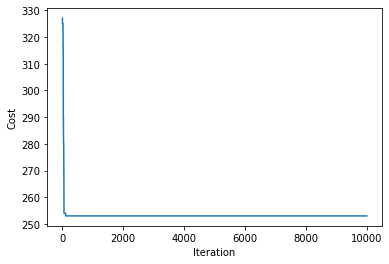

when T0 is: 12 when alpha is: 0.3


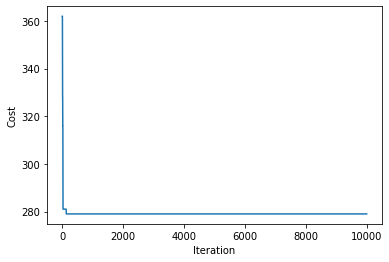

when T0 is: 12 when alpha is: 0.4


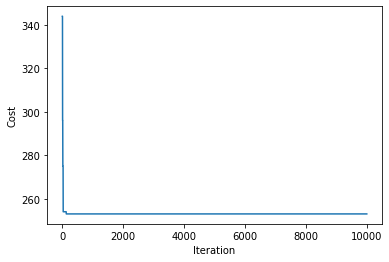

when T0 is: 12 when alpha is: 0.5


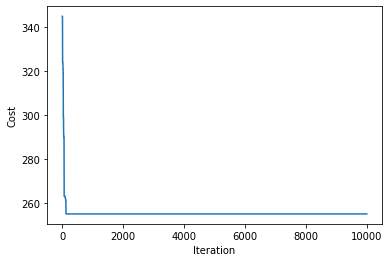

when T0 is: 12 when alpha is: 0.6


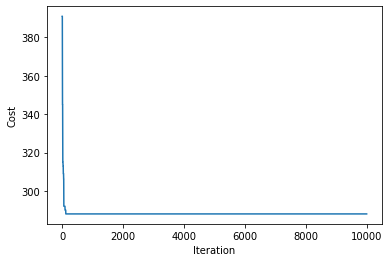

when T0 is: 12 when alpha is: 0.7


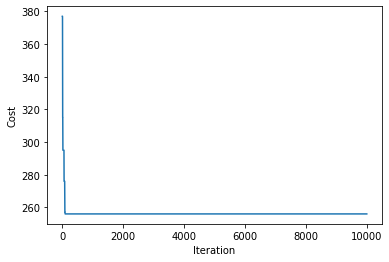

when T0 is: 12 when alpha is: 0.8


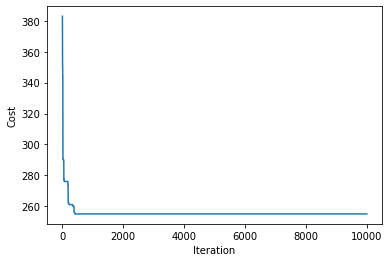

when T0 is: 12 when alpha is: 1


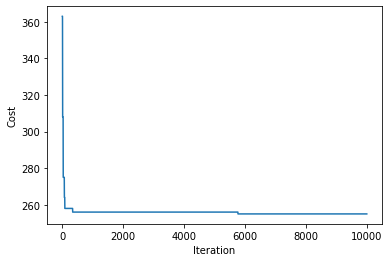

when T0 is: 13 when alpha is: 0.1


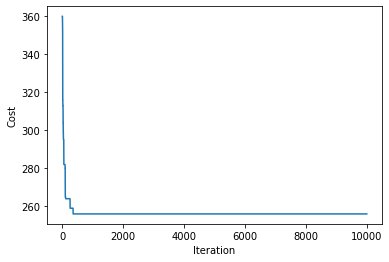

when T0 is: 13 when alpha is: 0.2


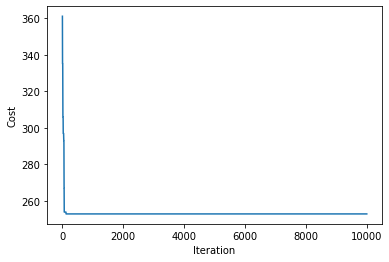

when T0 is: 13 when alpha is: 0.3


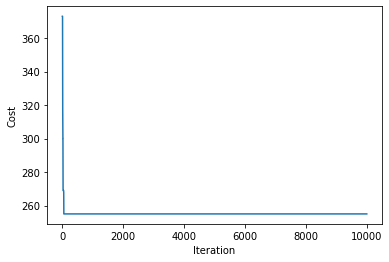

when T0 is: 13 when alpha is: 0.4


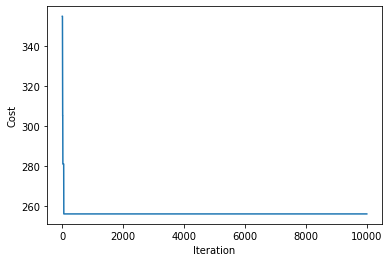

when T0 is: 13 when alpha is: 0.5


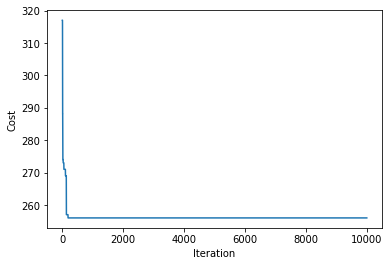

when T0 is: 13 when alpha is: 0.6


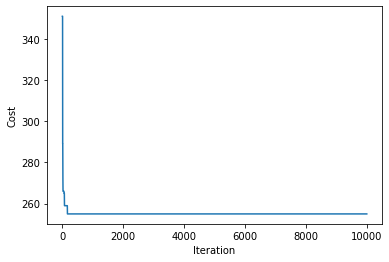

when T0 is: 13 when alpha is: 0.7


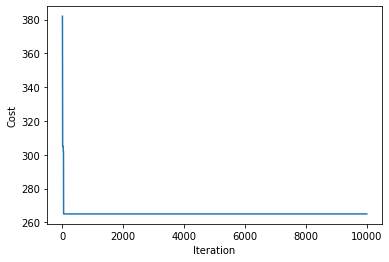

when T0 is: 13 when alpha is: 0.8


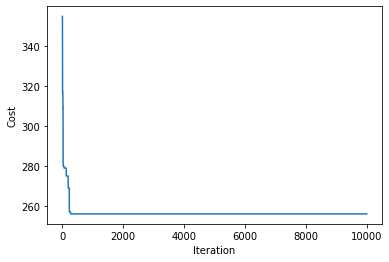

when T0 is: 13 when alpha is: 1


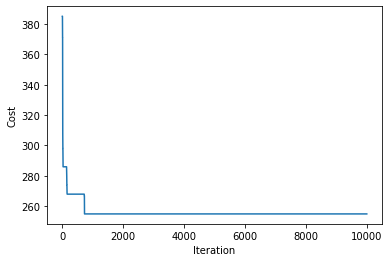

when T0 is: 14 when alpha is: 0.1


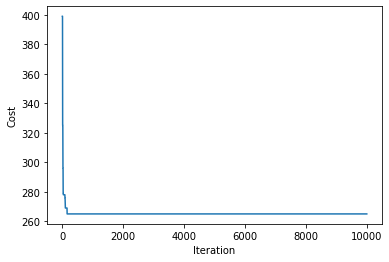

when T0 is: 14 when alpha is: 0.2


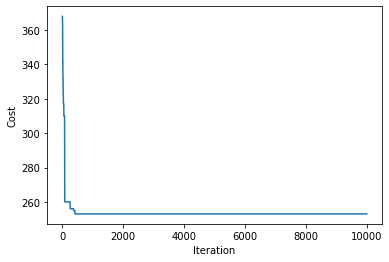

when T0 is: 14 when alpha is: 0.3


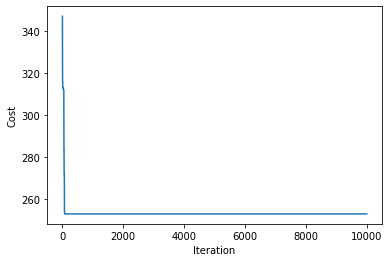

when T0 is: 14 when alpha is: 0.4


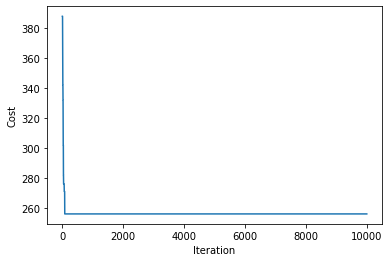

when T0 is: 14 when alpha is: 0.5


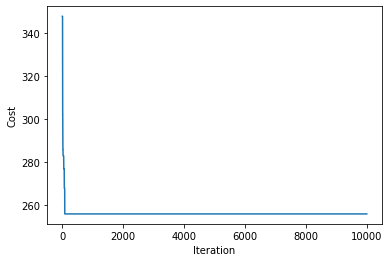

when T0 is: 14 when alpha is: 0.6


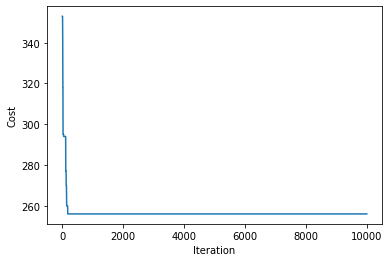

when T0 is: 14 when alpha is: 0.7


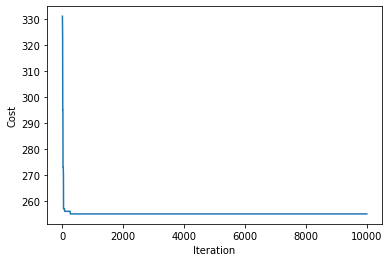

when T0 is: 14 when alpha is: 0.8


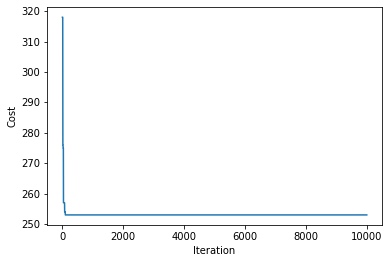

when T0 is: 14 when alpha is: 1


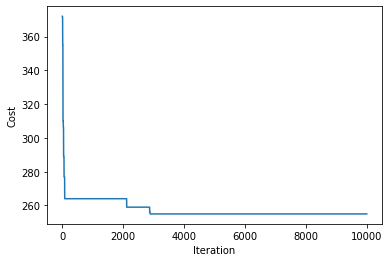

when T0 is: 15 when alpha is: 0.1


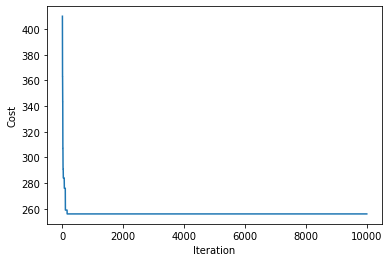

when T0 is: 15 when alpha is: 0.2


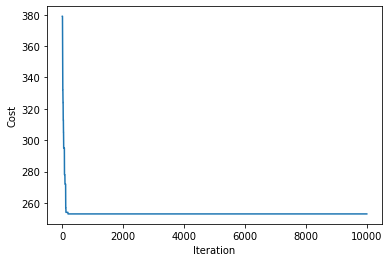

when T0 is: 15 when alpha is: 0.3


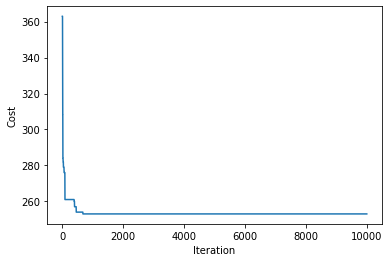

when T0 is: 15 when alpha is: 0.4


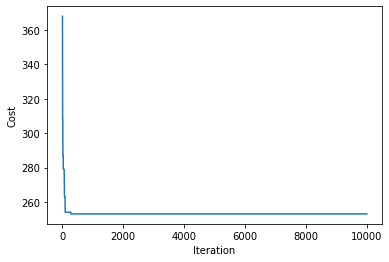

when T0 is: 15 when alpha is: 0.5


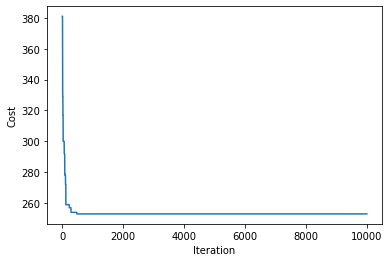

when T0 is: 15 when alpha is: 0.6


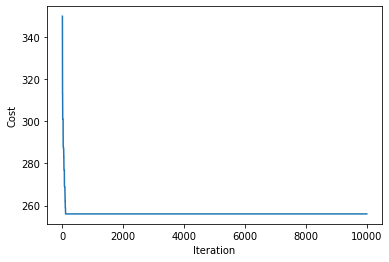

when T0 is: 15 when alpha is: 0.7


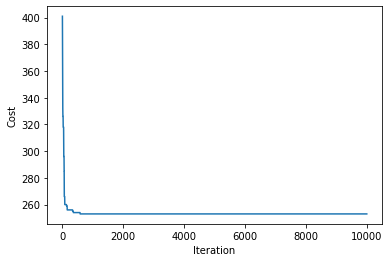

when T0 is: 15 when alpha is: 0.8


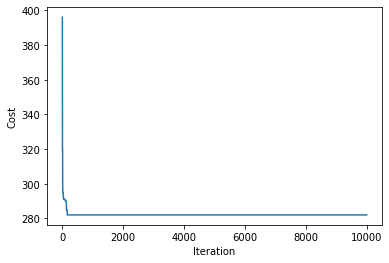

when T0 is: 15 when alpha is: 1


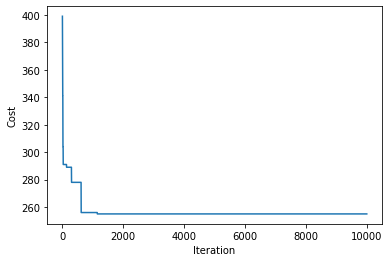

when T0 is: 16 when alpha is: 0.1


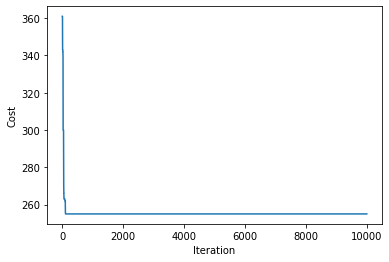

when T0 is: 16 when alpha is: 0.2


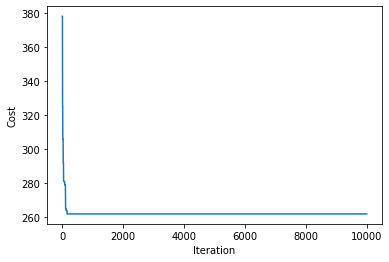

when T0 is: 16 when alpha is: 0.3


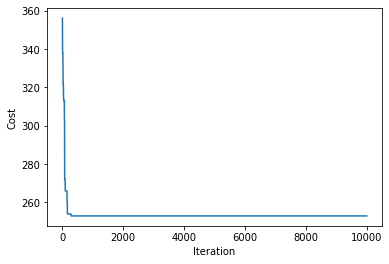

when T0 is: 16 when alpha is: 0.4


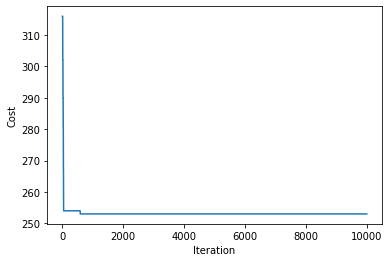

when T0 is: 16 when alpha is: 0.5


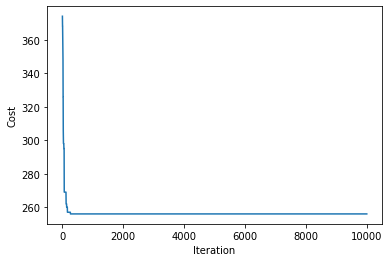

when T0 is: 16 when alpha is: 0.6


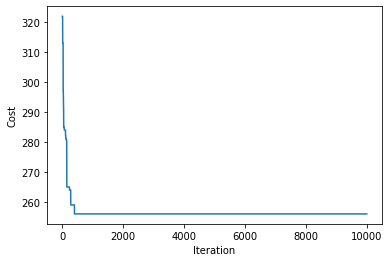

when T0 is: 16 when alpha is: 0.7


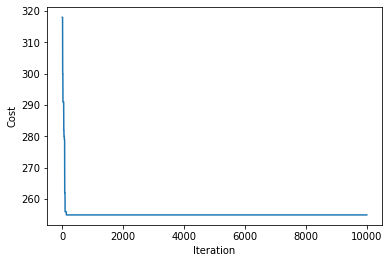

when T0 is: 16 when alpha is: 0.8


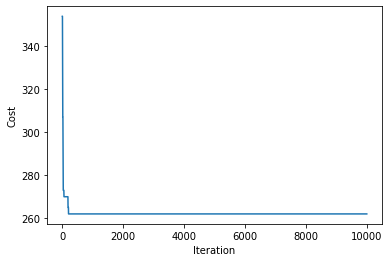

when T0 is: 16 when alpha is: 1


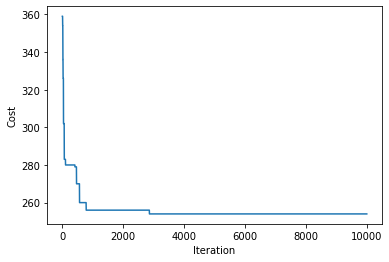

when T0 is: 17 when alpha is: 0.1


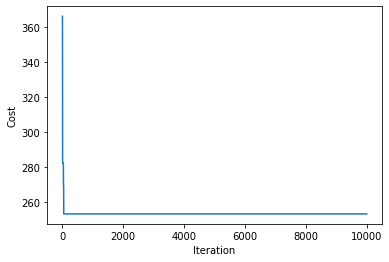

when T0 is: 17 when alpha is: 0.2


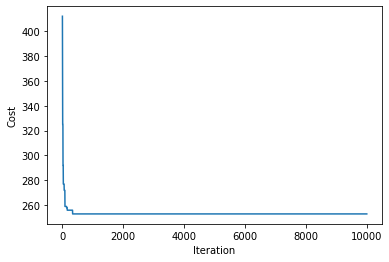

when T0 is: 17 when alpha is: 0.3


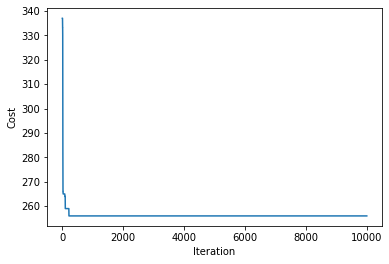

when T0 is: 17 when alpha is: 0.4


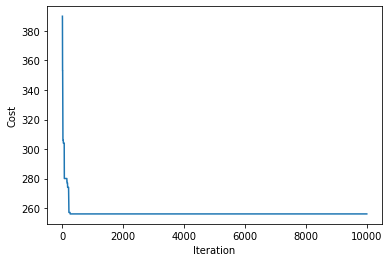

when T0 is: 17 when alpha is: 0.5


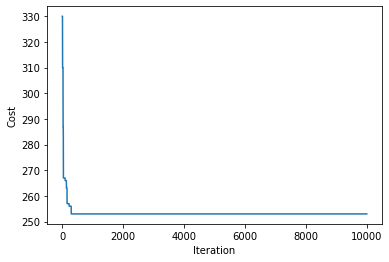

when T0 is: 17 when alpha is: 0.6


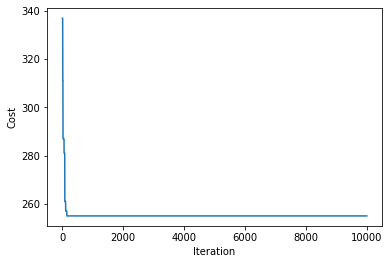

when T0 is: 17 when alpha is: 0.7


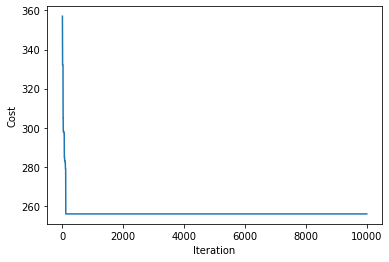

when T0 is: 17 when alpha is: 0.8


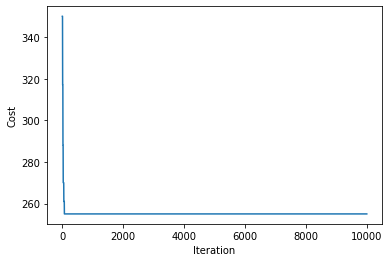

when T0 is: 17 when alpha is: 1


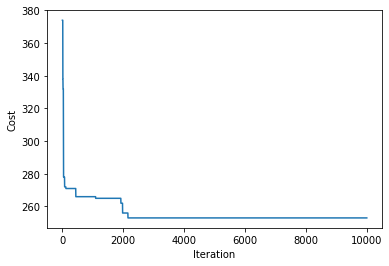

when T0 is: 18 when alpha is: 0.1


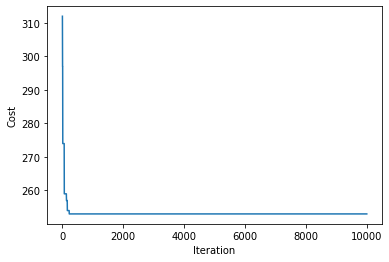

when T0 is: 18 when alpha is: 0.2


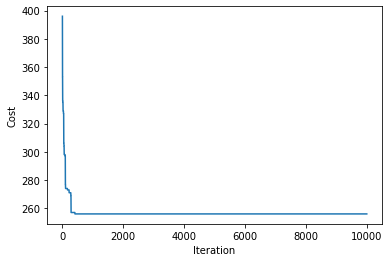

when T0 is: 18 when alpha is: 0.3


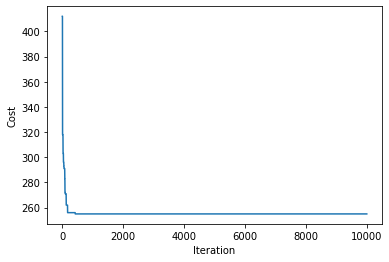

when T0 is: 18 when alpha is: 0.4


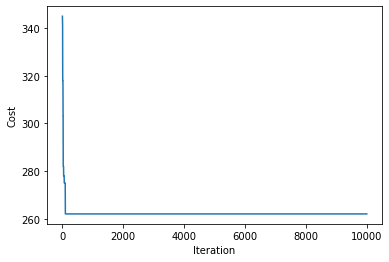

when T0 is: 18 when alpha is: 0.5


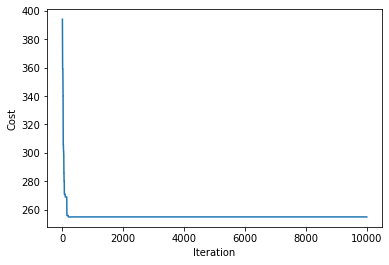

when T0 is: 18 when alpha is: 0.6


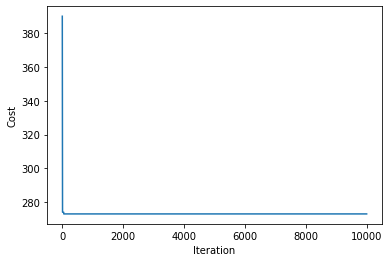

when T0 is: 18 when alpha is: 0.7


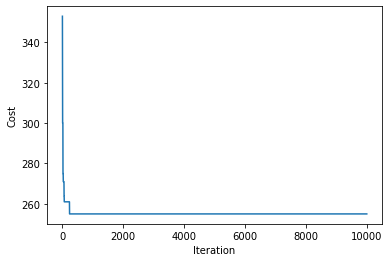

when T0 is: 18 when alpha is: 0.8


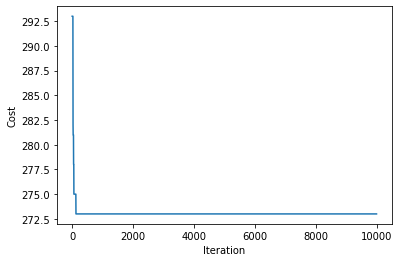

when T0 is: 18 when alpha is: 1


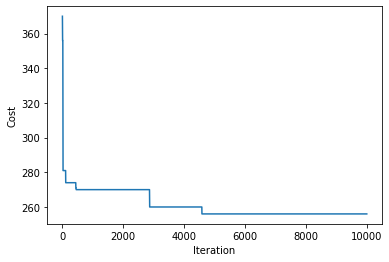

when T0 is: 19 when alpha is: 0.1


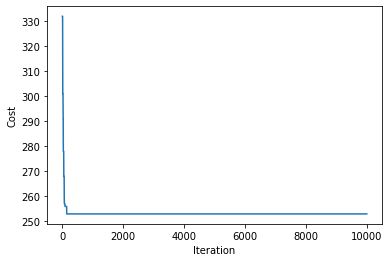

when T0 is: 19 when alpha is: 0.2


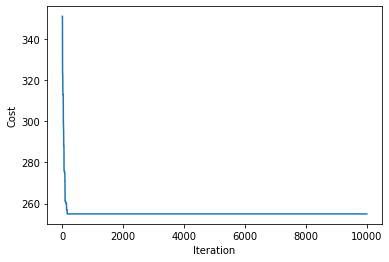

when T0 is: 19 when alpha is: 0.3


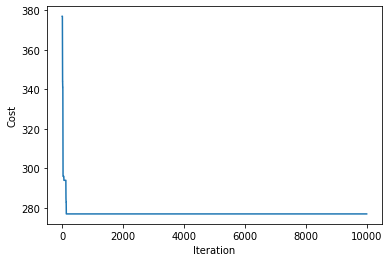

when T0 is: 19 when alpha is: 0.4


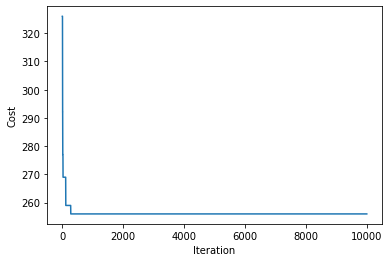

when T0 is: 19 when alpha is: 0.5


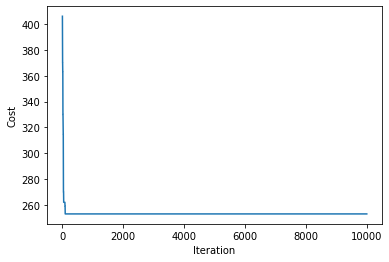

when T0 is: 19 when alpha is: 0.6


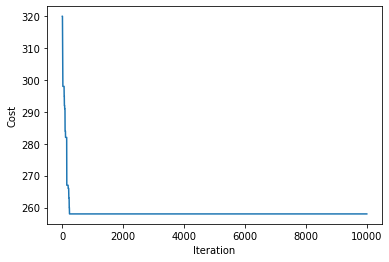

when T0 is: 19 when alpha is: 0.7


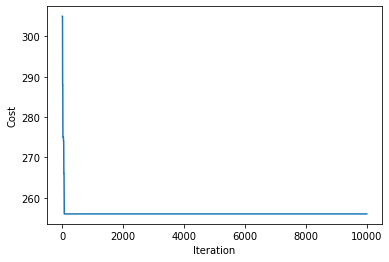

when T0 is: 19 when alpha is: 0.8


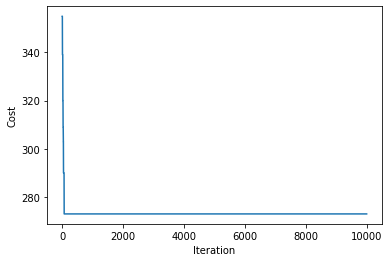

when T0 is: 19 when alpha is: 1


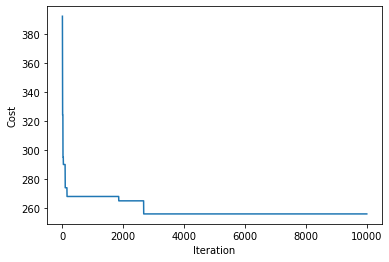

In [39]:
for i in T0:
  for j in alpha:
    print("when T0 is:",i,"when alpha is:", j)
    x, c, costs = simulated_annealing(cost, neighbour, accept_prob, T0=i, alpha=j, maxiter=10000)
    plt.plot(costs)
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.show()


High T0: A high initial temperature allows the algorithm to explore a larger search space, which can increase the chances of finding a global optimal solution. However, it may also lead to a longer annealing process and require more computational resources.

Low T0: A low initial temperature limits the search to a smaller region of the search space, which can decrease the chances of finding a global optimal solution. However, it may also lead to a faster annealing process and require fewer computational resources.

High α: A high cooling rate decreases the temperature quickly, which can lead to premature convergence and a suboptimal solution. However, it may also lead to a faster annealing process and require fewer computational resources.


$9$. (R) Come up with another cooling schedule (not of the form Tk+1 = αTk ) and comment on the change in
behaviour of the algorithm.

Solution:

cooling schedules that can be used in the simulated annealing algorithm. One such schedule is the  cooling schedule, which decreases the temperature logarithmically with each iteration. The formula for the  cooling schedule is as follows:
$T_{k+1}=\frac{T}{1+\alpha*T_{k}}$
where c is a constant, k is the current iteration number, and Tk+1 is the updated temperature for the next iteration.

This cooling schedule decreases the temperature more slowly than the linear schedule, which can allow the algorithm to explore the search space more thoroughly. However, it can also cause the algorithm to get stuck in local optima for longer periods of time.

When using the  cooling schedule, it is important to choose an appropriate value for the constant c. This value should be chosen such that the temperature decreases slowly enough to allow for thorough exploration, but not so slowly that the algorithm gets stuck in local optima for too long.

Overall, the choice of cooling schedule can have a significant impact on the behavior of the simulated annealing algorithm. Different schedules can be more or less effective depending on the specific problem being solved and the desired trade-off between exploration and exploitation.






In [44]:
def compute_distance(distances, solution):
    distance = 0
    for i in range(len(solution) - 1):
        distance += distances[cities.index(solution[i])][cities.index(solution[i+1])]
    distance += distances[cities.index(solution[-1])][cities.index(solution[0])]
    return distance

In [45]:
# Define the simulated annealing algorithm
def simulated_annealing(distances, initial_solution, initial_temperature, cooling_rate,max_iteration):
    current_solution = initial_solution
    best_solution = initial_solution
    current_distance = compute_distance(distances, initial_solution)
    best_distance = current_distance
    temperature = initial_temperature
    cost=[]
    k=0
    while temperature > 0:
        # Make a small random change to the current solution
        new_solution = current_solution.copy()
        i, j = sorted(random.sample(range(len(x)), 2))
        new_solution[i:j+1] = reversed(new_solution[i:j+1])
        new_distance = compute_distance(distances, new_solution)
        # Decide whether to accept the new solution
        delta_distance = new_distance - current_distance
        if delta_distance < 0 or math.exp(-delta_distance / temperature) > random.random():
            current_solution = new_solution
            current_distance = new_distance
            cost.append(new_distance)
        # Update the best solution if necessary
        if current_distance < best_distance:
            best_solution = current_solution
            best_distance = current_distance
        # Decrease the temperature
        temperature =temperature/(1+temperature*cooling_rate)
        k+=1
        if k>=max_iteration:
          return  best_solution, best_distance,cost
    return best_solution, best_distance,cost


In [46]:
distances =distance_matrix
# Define the initial solution
cities = [str(i) for i in range(1,12)]
initial_solution = random.sample(cities, len(cities))

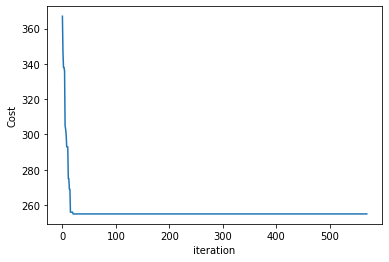

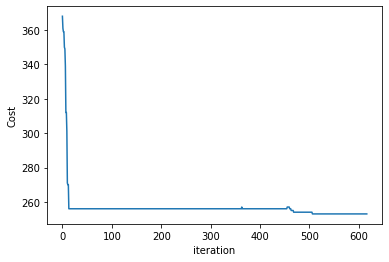

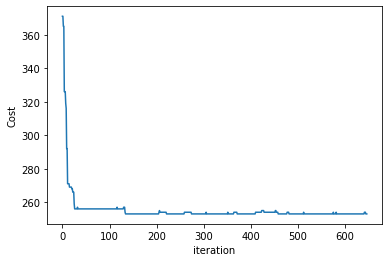

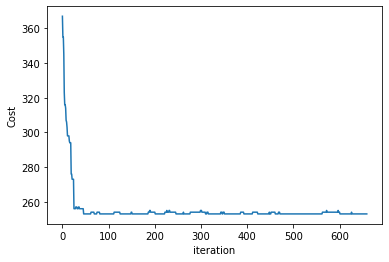

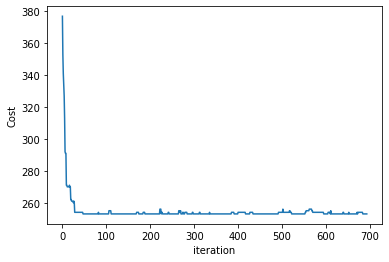

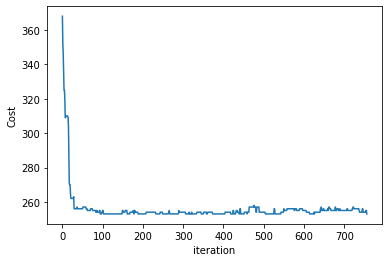

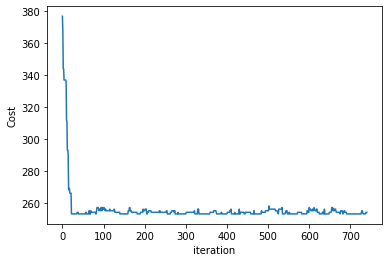

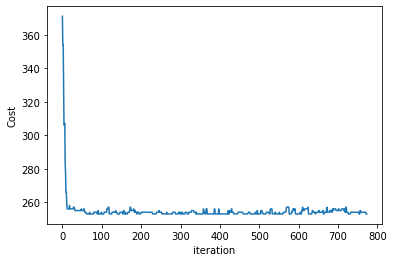

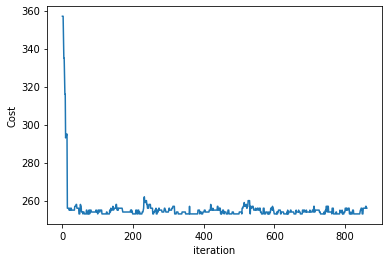

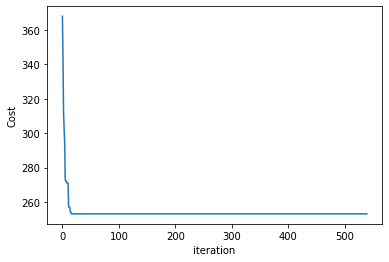

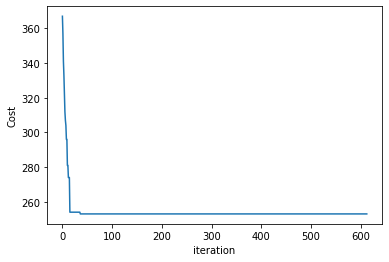

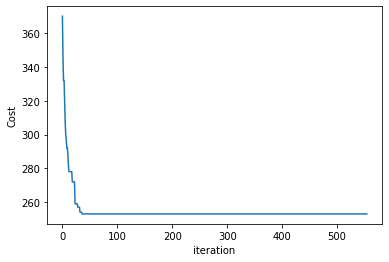

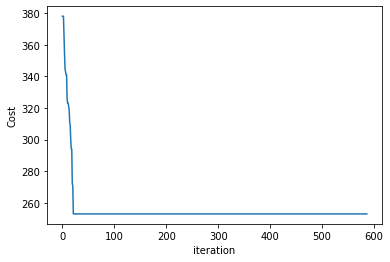

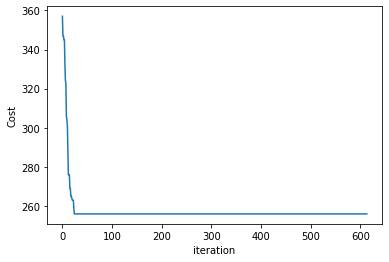

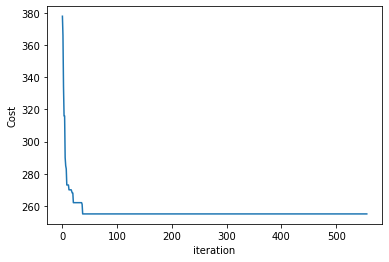

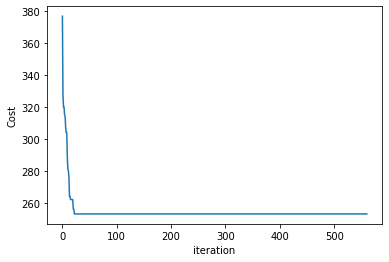

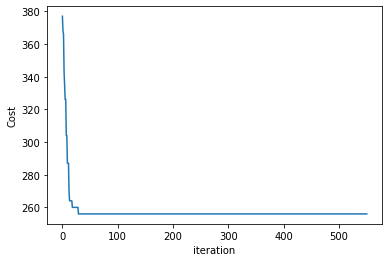

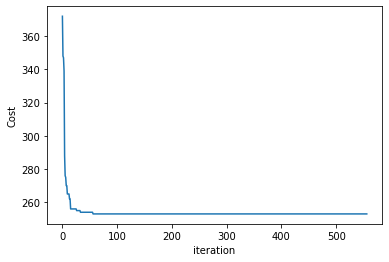

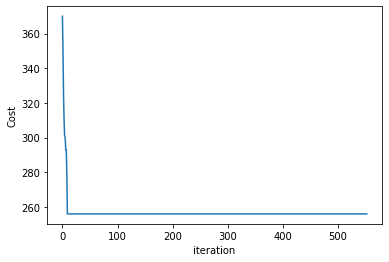

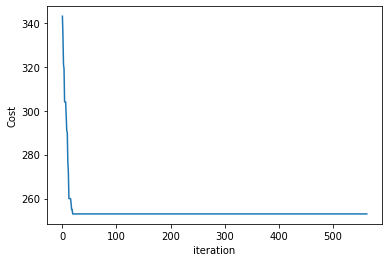

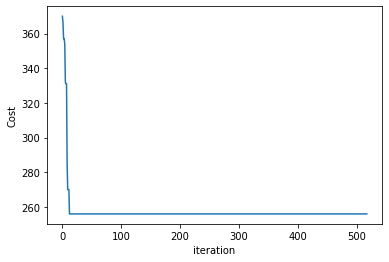

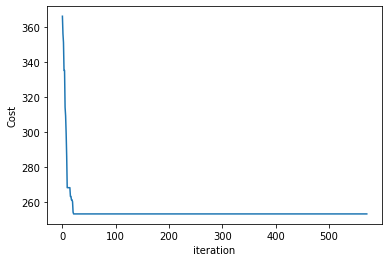

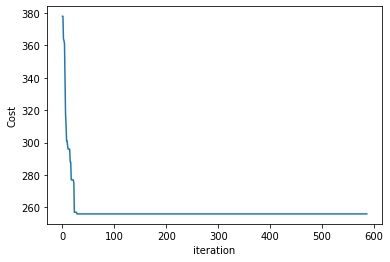

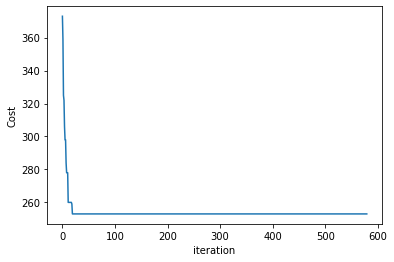

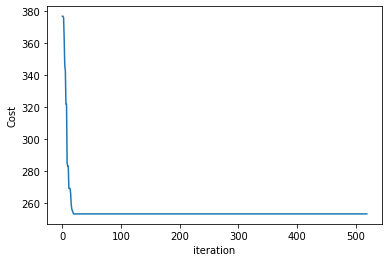

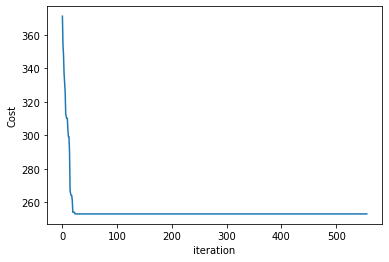

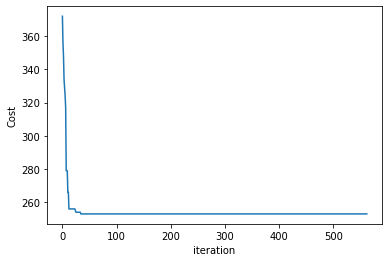

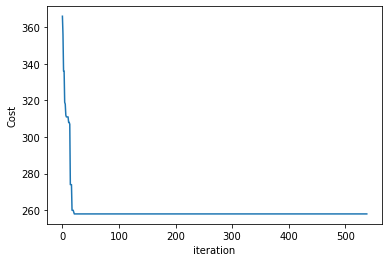

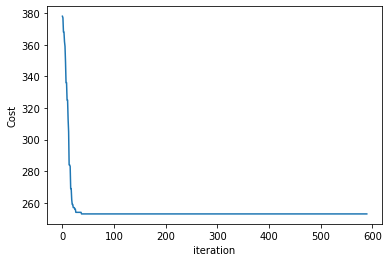

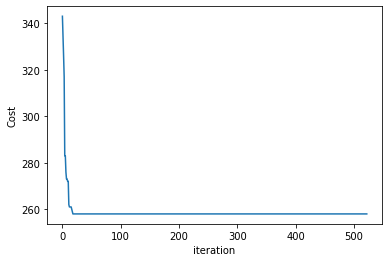

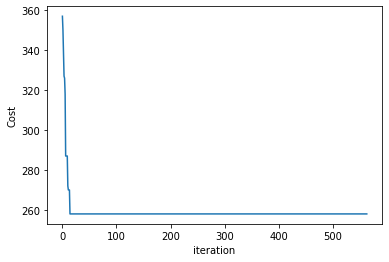

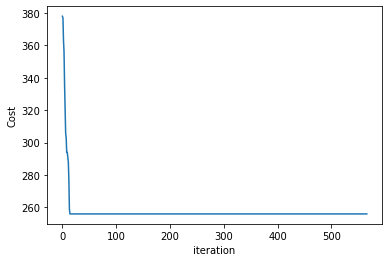

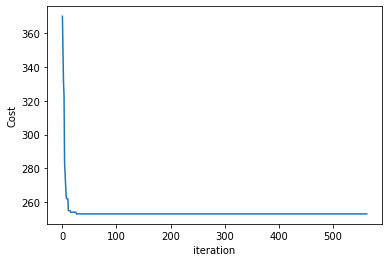

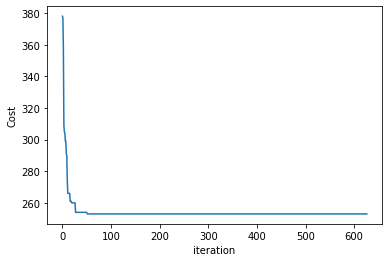

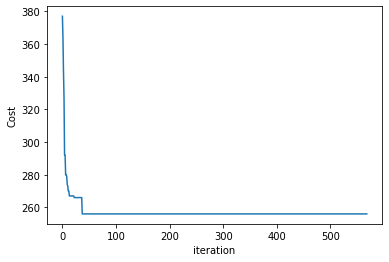

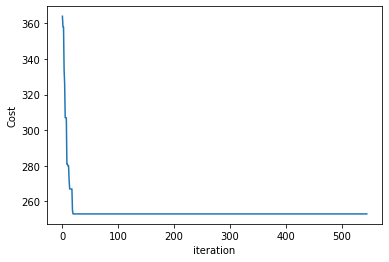

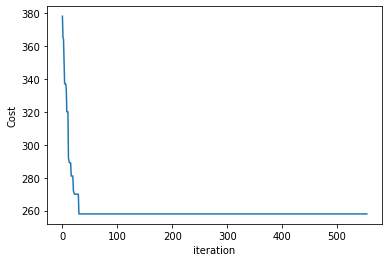

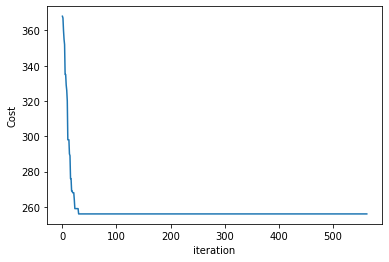

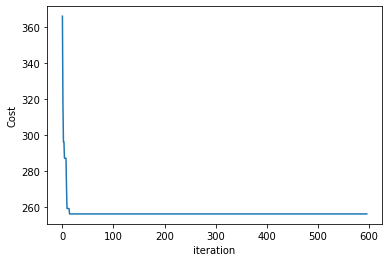

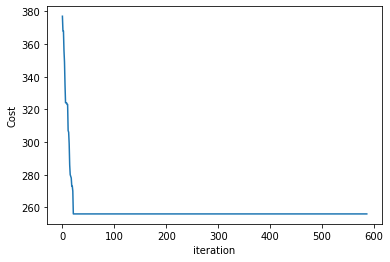

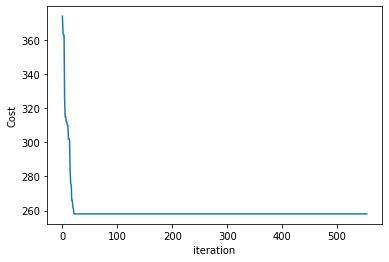

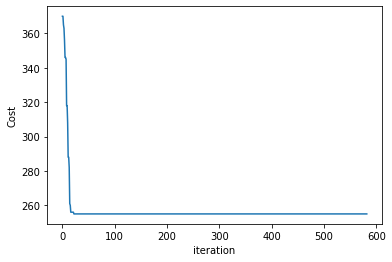

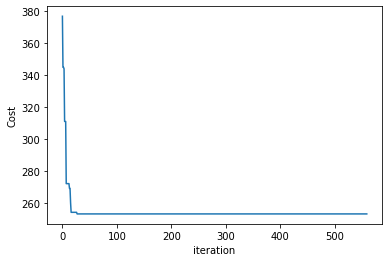

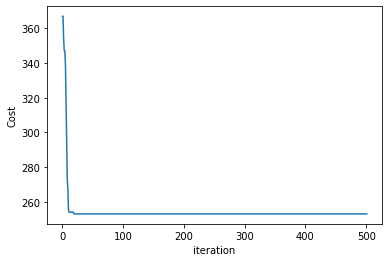

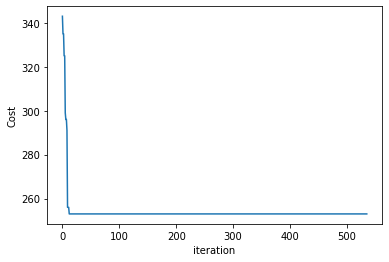

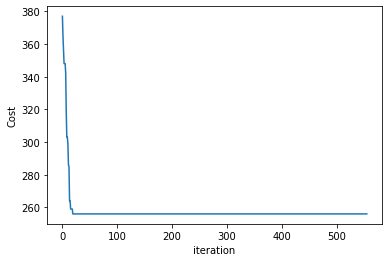

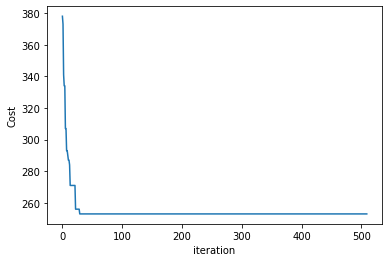

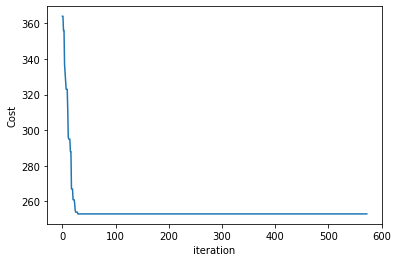

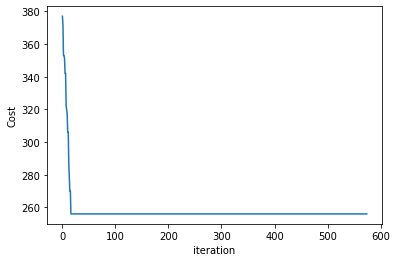

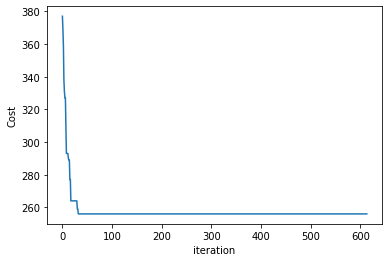

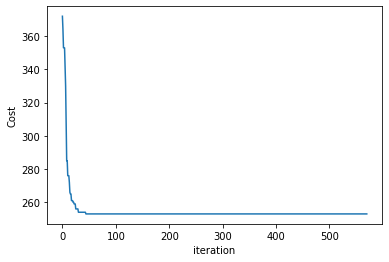

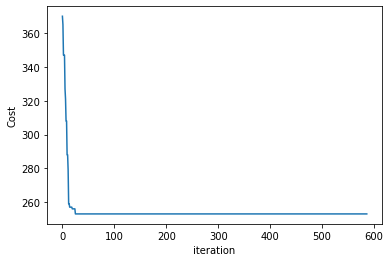

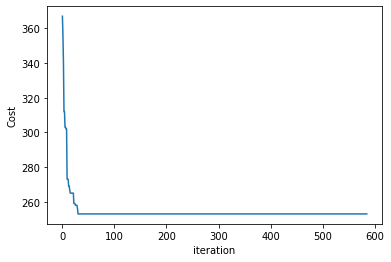

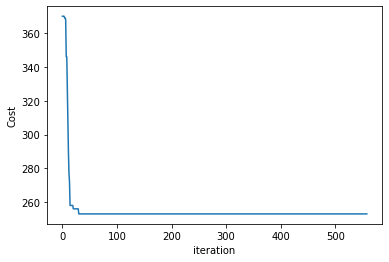

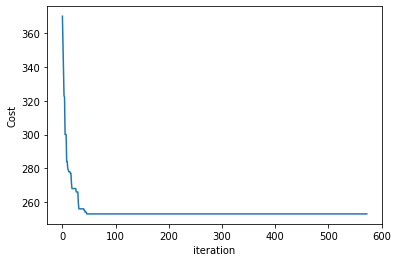

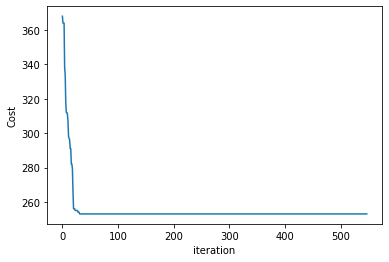

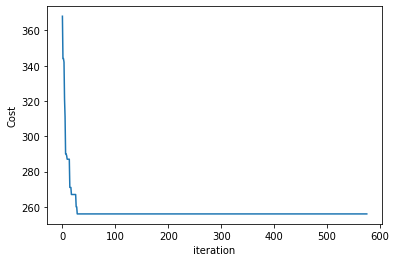

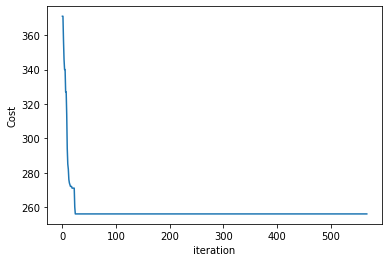

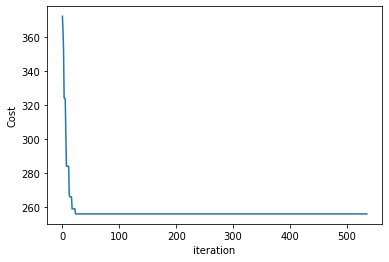

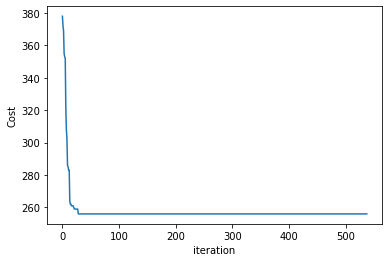

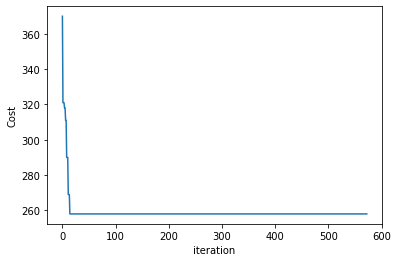

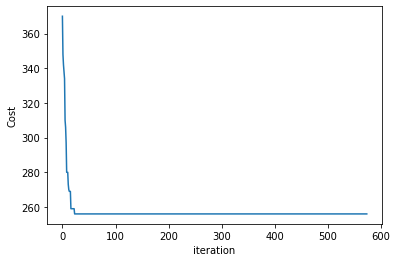

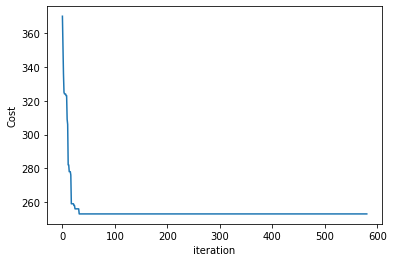

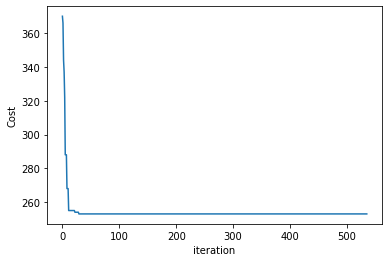

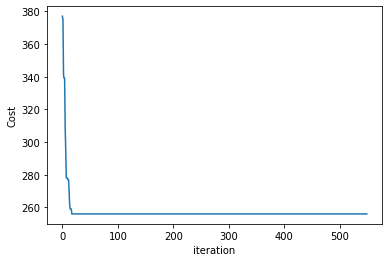

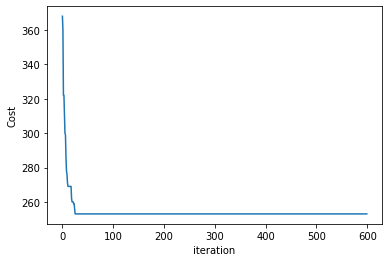

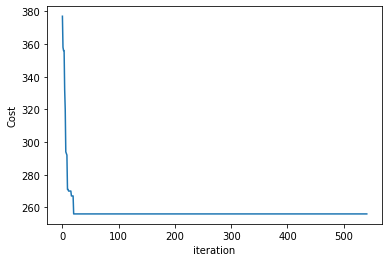

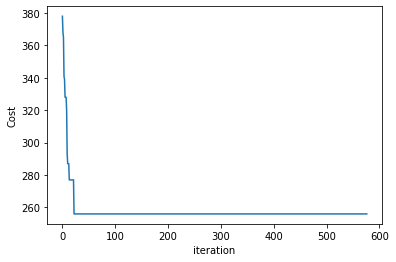

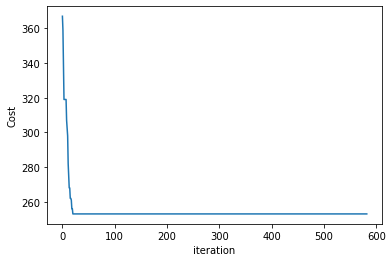

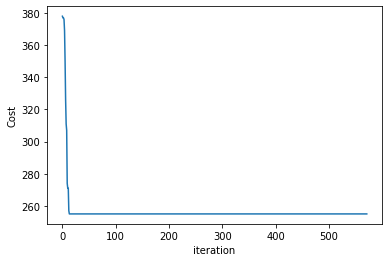

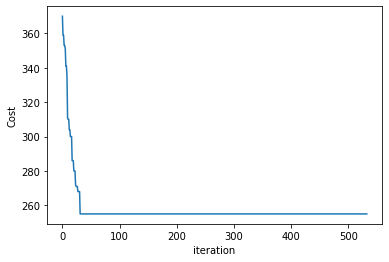

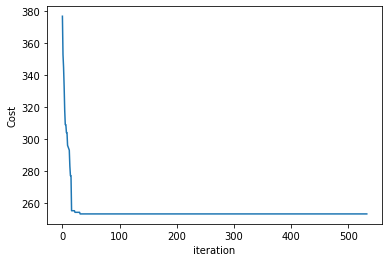

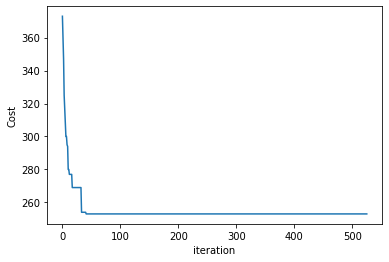

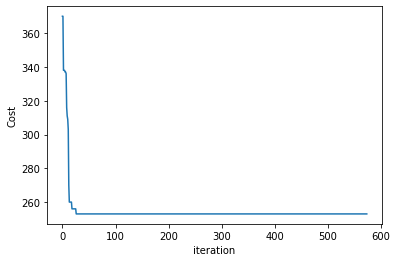

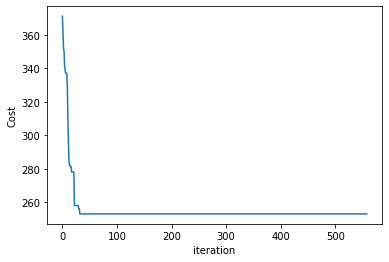

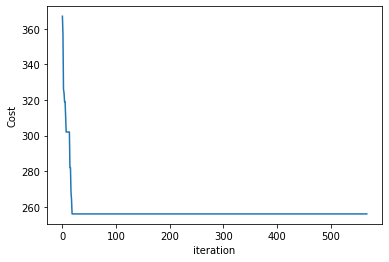

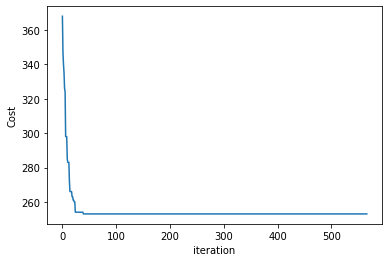

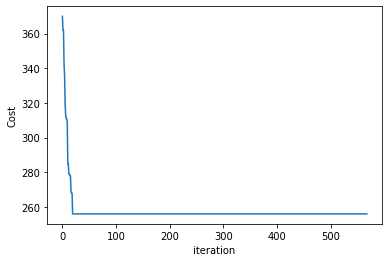

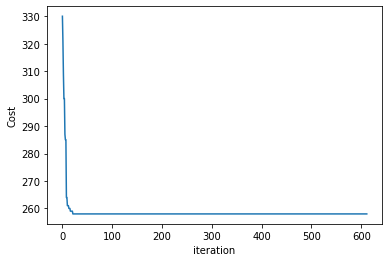

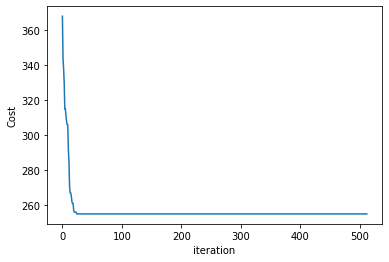

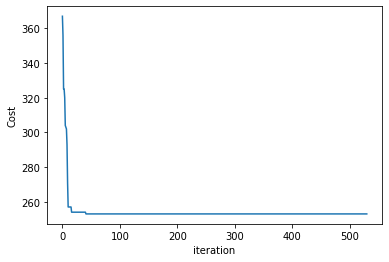

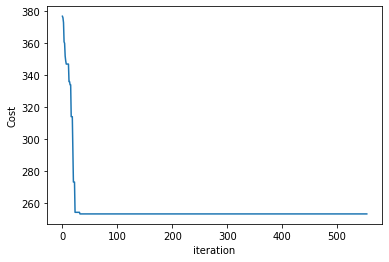

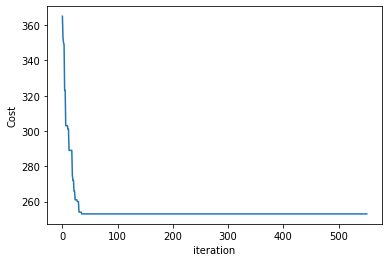

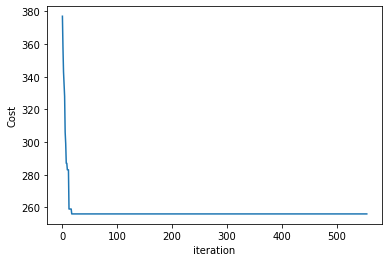

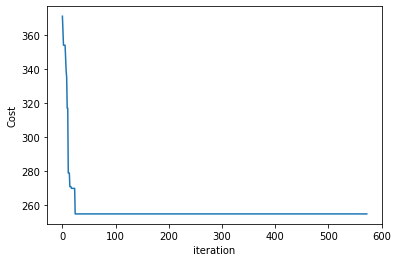

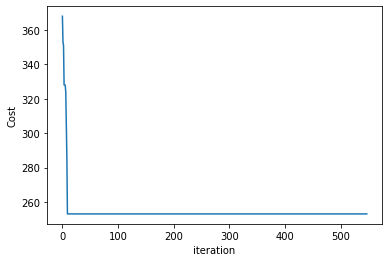

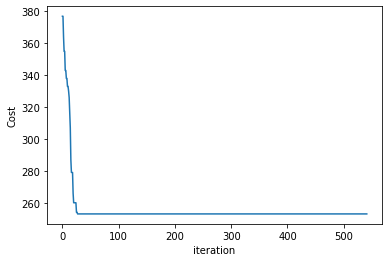

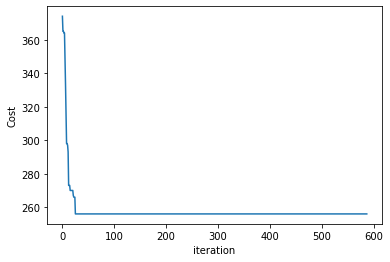

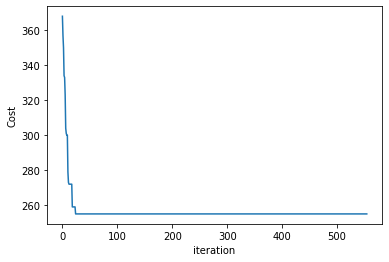

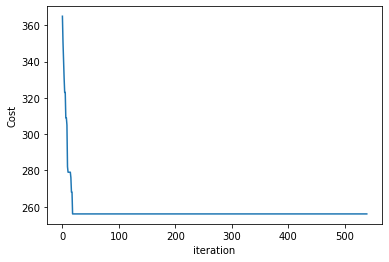

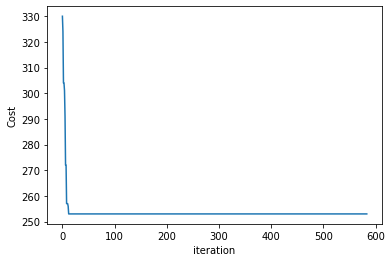

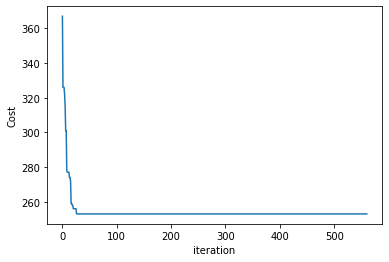

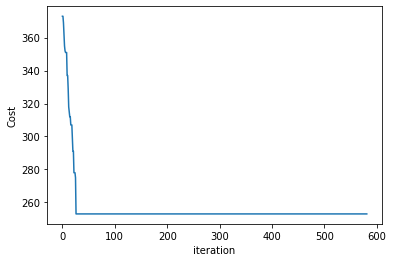

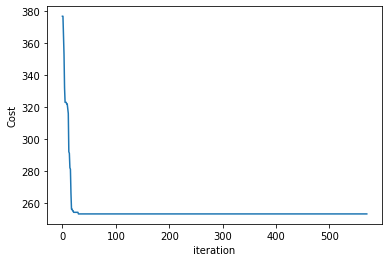

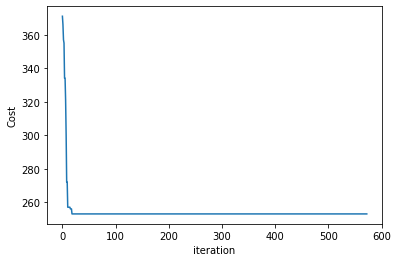

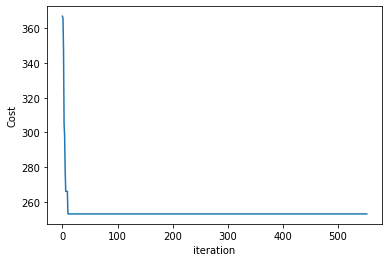

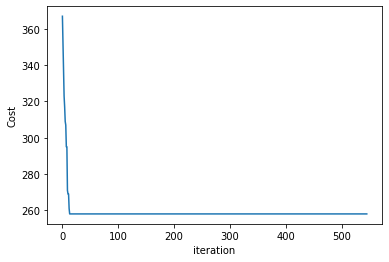

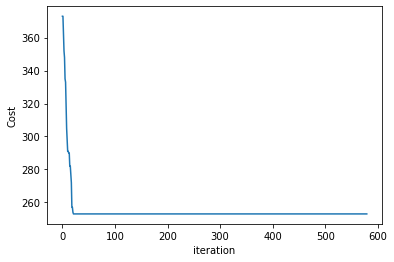

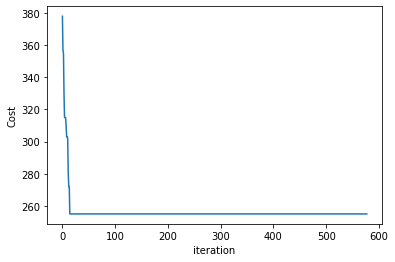

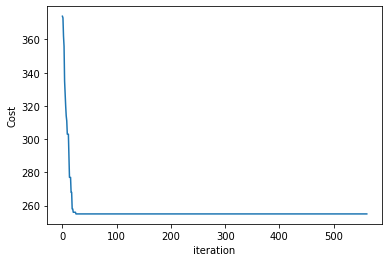

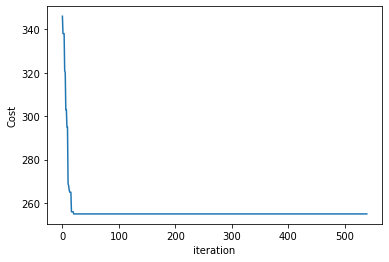

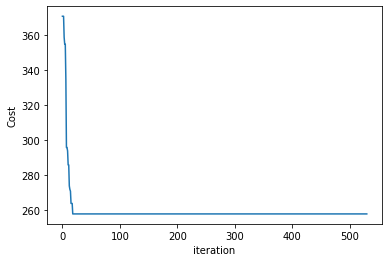

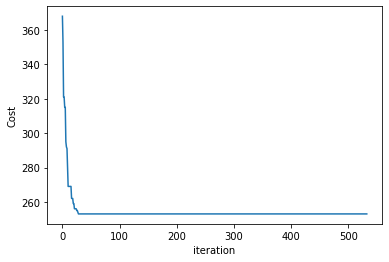

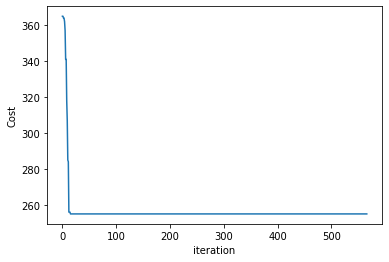

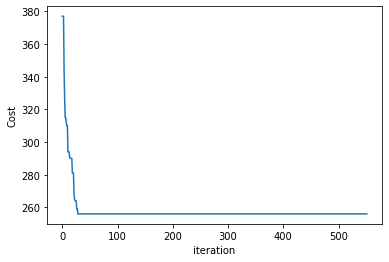

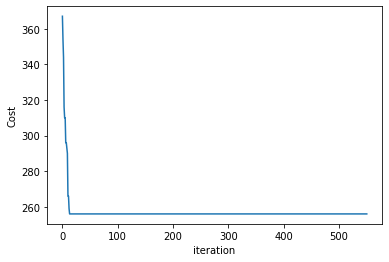

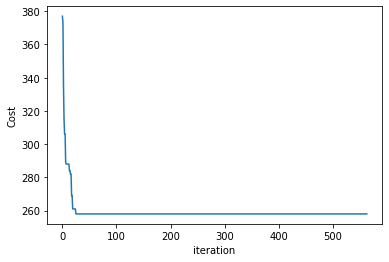

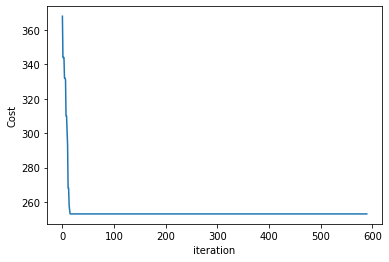

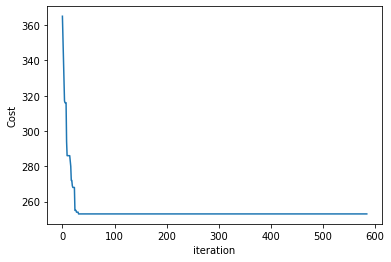

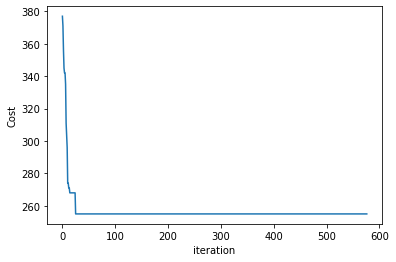

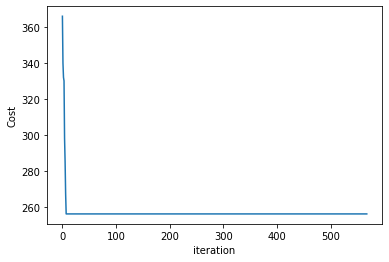

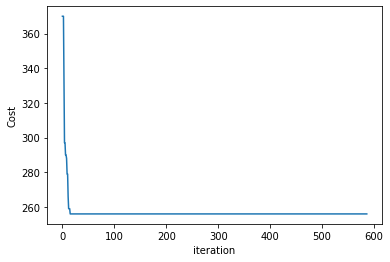

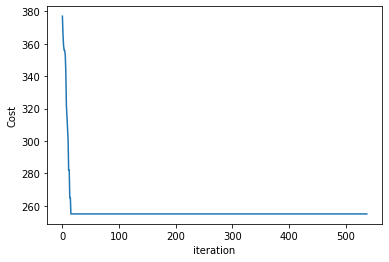

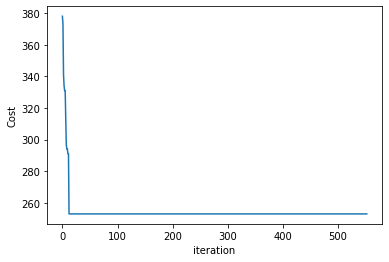

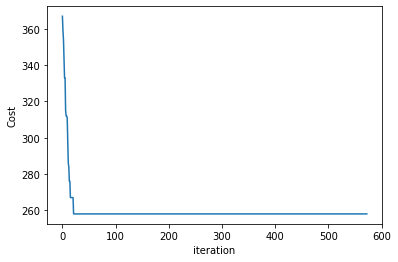

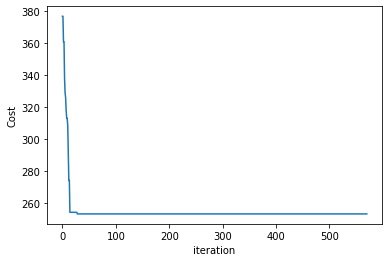

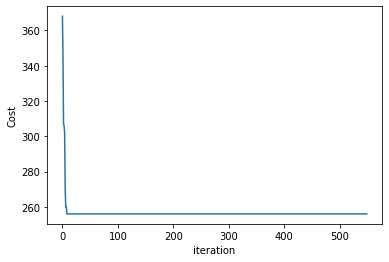

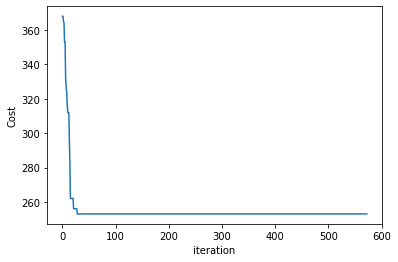

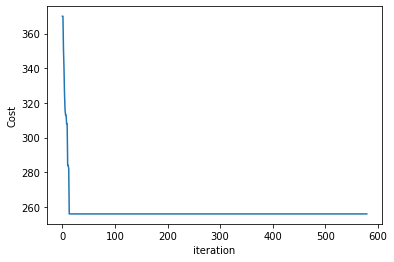

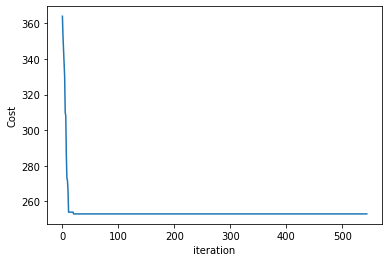

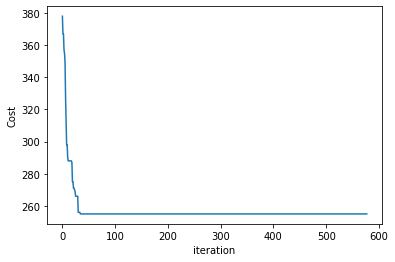

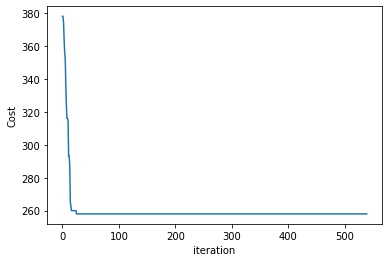

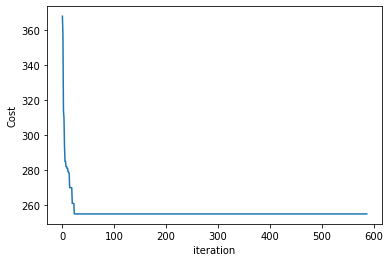

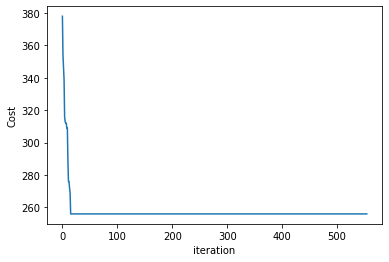

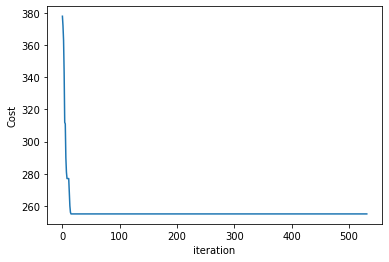

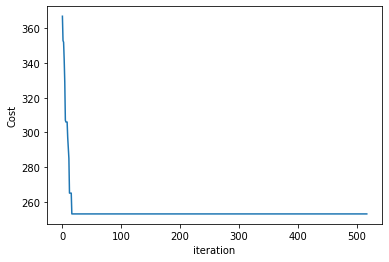

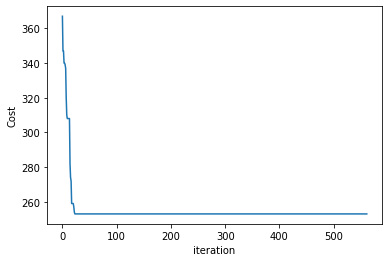

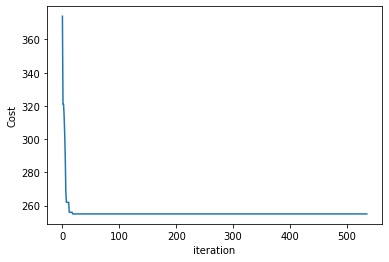

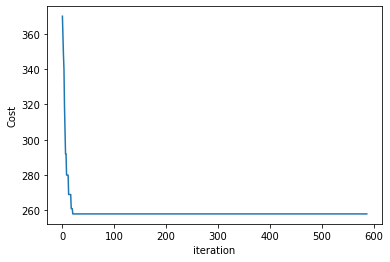

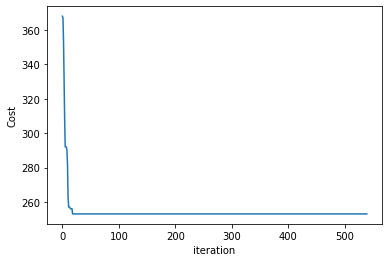

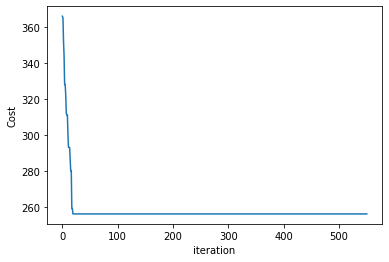

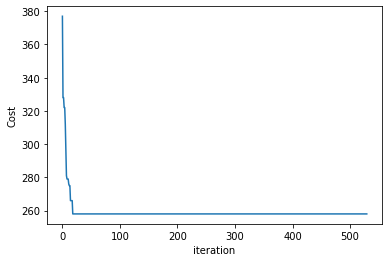

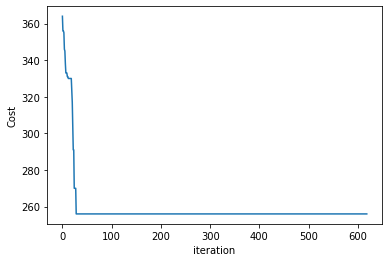

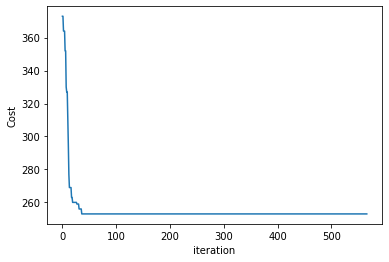

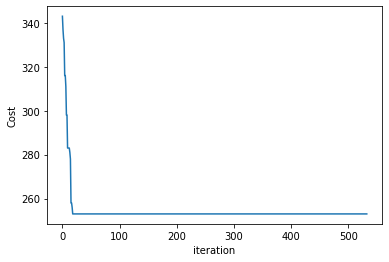

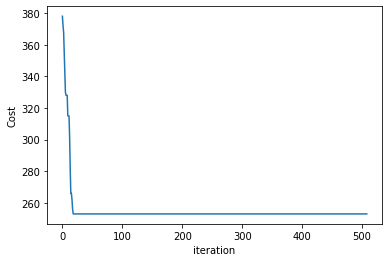

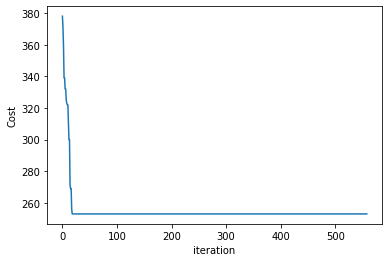

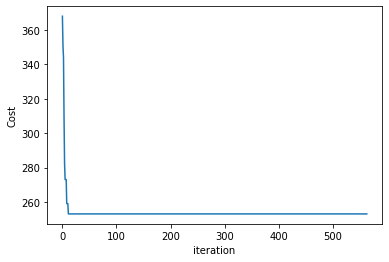

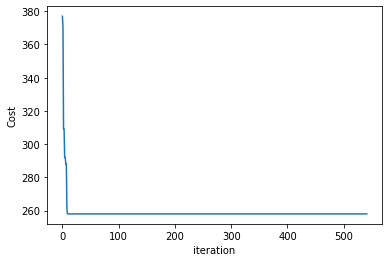

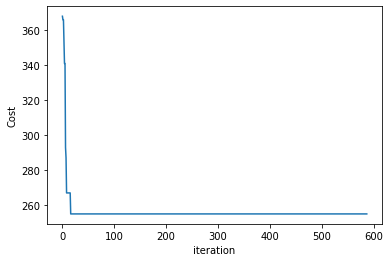

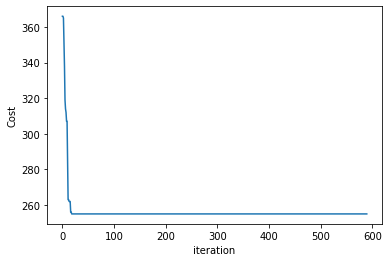

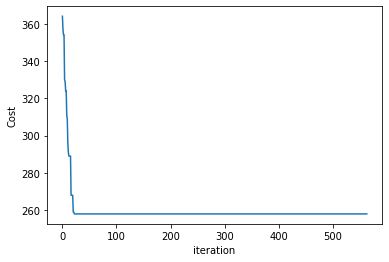

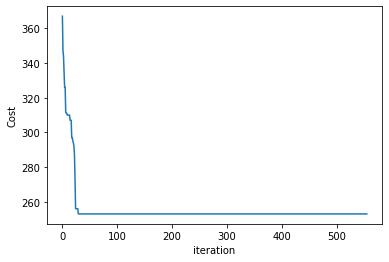

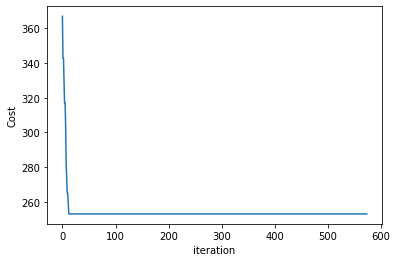

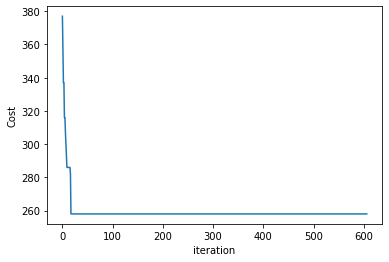

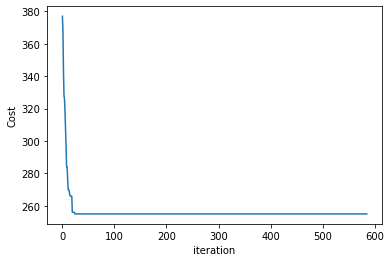

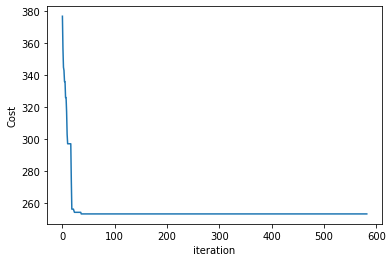

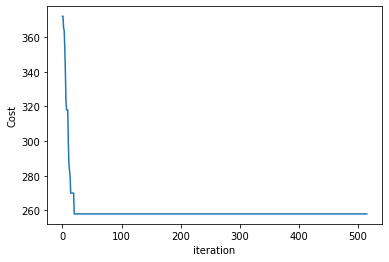

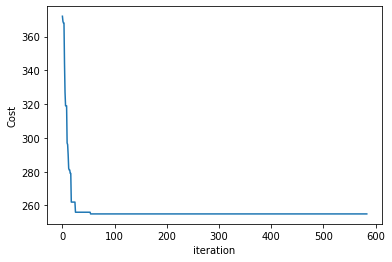

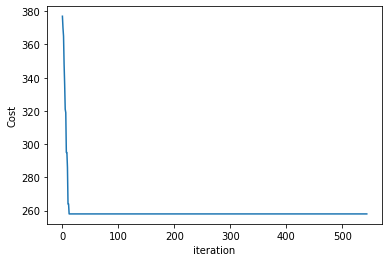

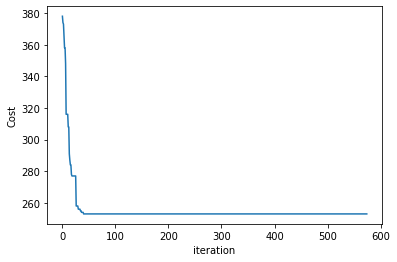

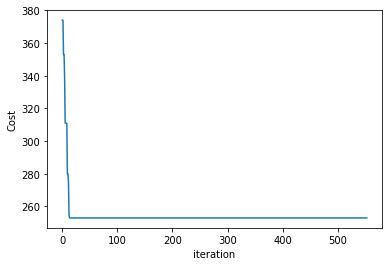

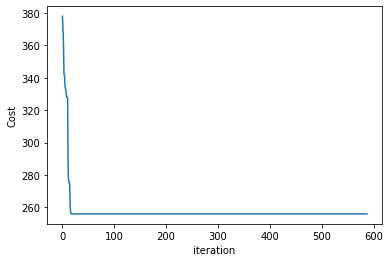

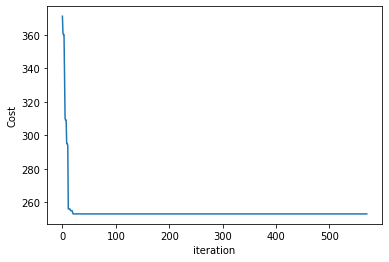

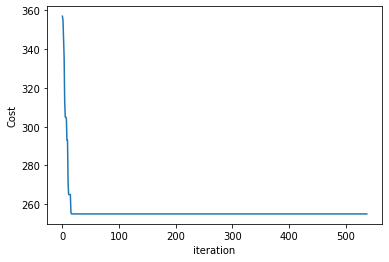

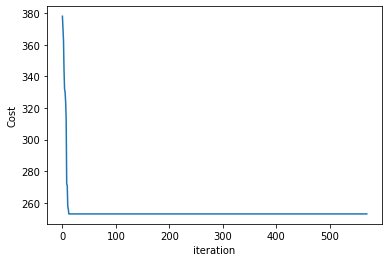

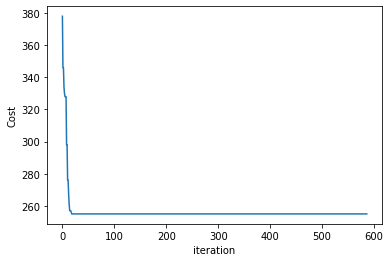

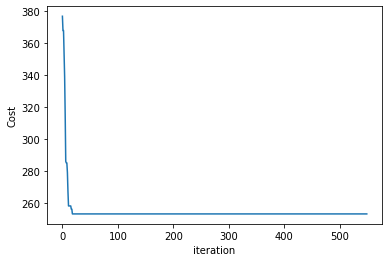

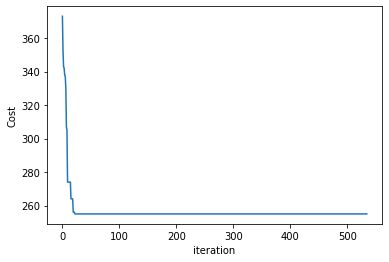

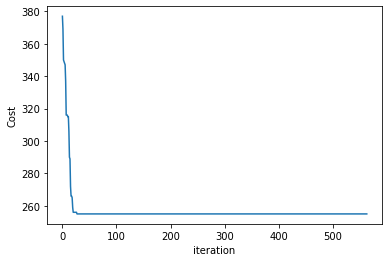

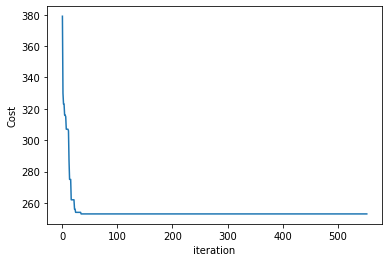

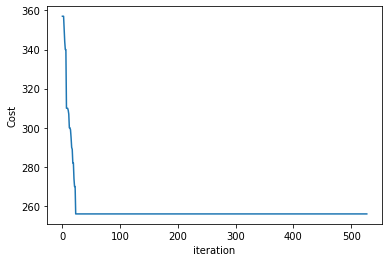

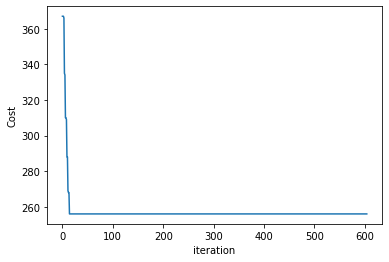

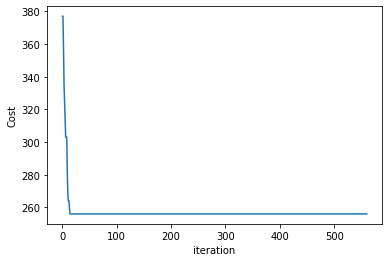

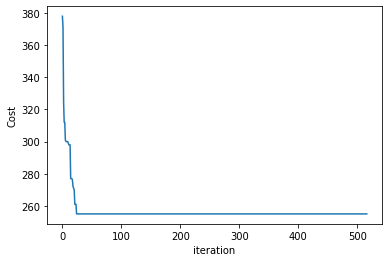

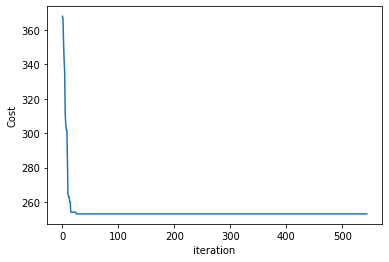

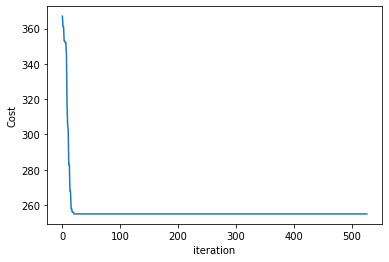

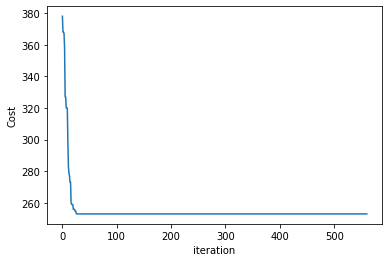

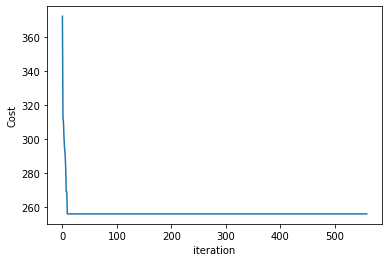

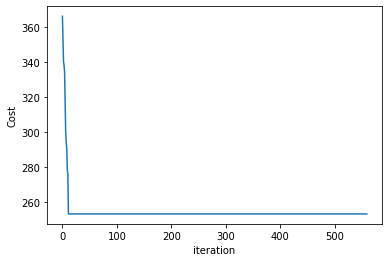

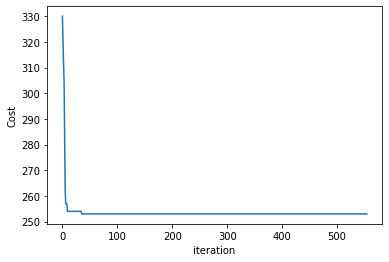

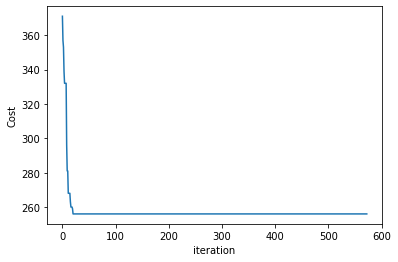

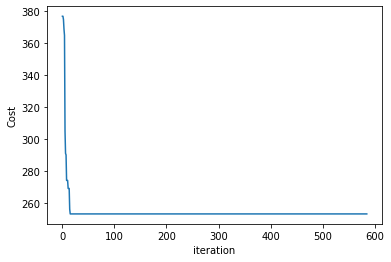

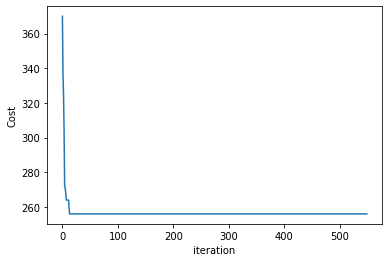

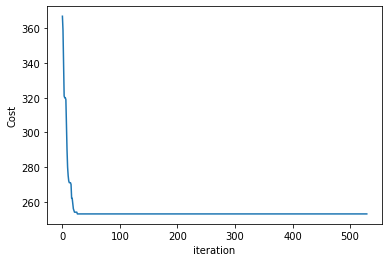

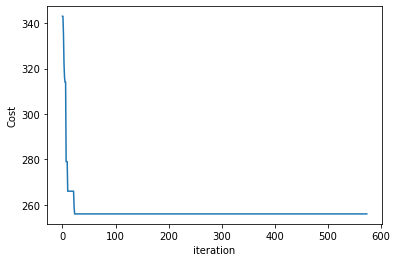

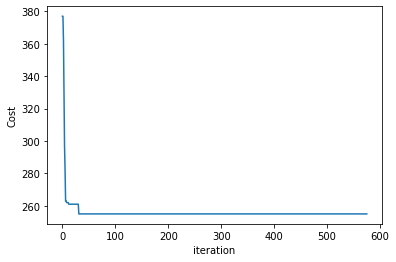

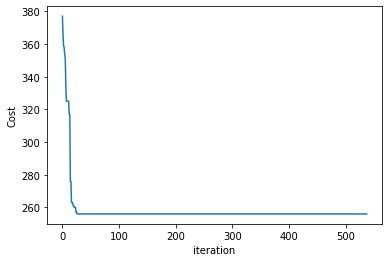

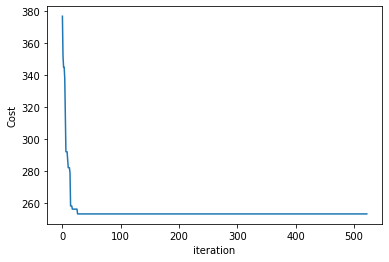

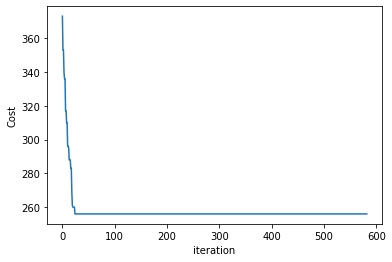

In [47]:
for i in T0:
  for j in alpha:
    x, c,cost = simulated_annealing(distances, initial_solution,j,i,10000)
    plt.plot(cost)
    plt.xlabel("iteration")
    plt.ylabel('Cost')
    plt.show()